# EDA on Loan Defaulters Data

## Phases
* Phase 1 - Fill missing values and fix individual columns
* Phase 2 - Understand distributions
* Phase 3 - Analyze relationships
* Phase 4 - Let's see

## Phase 2

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, math
from pathlib import Path

In [48]:
df = pd.read_csv("../data/processed/dataset_cleaned_v1.csv")

In [49]:
df['ID'] = df['ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID                             121856 non-null  object 
 1   Client_Income                  121856 non-null  float64
 2   Car_Owned                      121856 non-null  float64
 3   Bike_Owned                     121856 non-null  float64
 4   Active_Loan                    121856 non-null  float64
 5   House_Own                      121856 non-null  float64
 6   Child_Count                    121856 non-null  float64
 7   Credit_Amount                  121856 non-null  float64
 8   Loan_Annuity                   121856 non-null  float64
 9   Accompany_Client               121856 non-null  object 
 10  Client_Income_Type             121856 non-null  object 
 11  Client_Education               121856 non-null  object 
 12  Client_Marital_Status         

In [50]:
for col in df.columns:
    dtype = df[col].dtype
    nunique = df[col].nunique(dropna=True)
    
    print(f"{col}  |  dtype: {dtype}  |  unique: {nunique}")
    
    if nunique < 5:
        print("   → Unique values:", df[col].unique())
    
    print("-" * 60)


ID  |  dtype: object  |  unique: 121856
------------------------------------------------------------
Client_Income  |  dtype: float64  |  unique: 1217
------------------------------------------------------------
Car_Owned  |  dtype: float64  |  unique: 2
   → Unique values: [0. 1.]
------------------------------------------------------------
Bike_Owned  |  dtype: float64  |  unique: 2
   → Unique values: [0. 1.]
------------------------------------------------------------
Active_Loan  |  dtype: float64  |  unique: 2
   → Unique values: [1. 0.]
------------------------------------------------------------
House_Own  |  dtype: float64  |  unique: 2
   → Unique values: [0. 1.]
------------------------------------------------------------
Child_Count  |  dtype: float64  |  unique: 15
------------------------------------------------------------
Credit_Amount  |  dtype: float64  |  unique: 4176
------------------------------------------------------------
Loan_Annuity  |  dtype: float64  |  uni

In [51]:
# replace 'XNA' in Client_Gender with Mode
mode_gender = df['Client_Gender'].mode()[0]
df['Client_Gender'] = df['Client_Gender'].replace('XNA', mode_gender)

# encode binary columns
binary_cols = [col for col in df.columns if df[col].nunique(dropna=True) == 2]

# convert all binary columns except 'Default' to Category
for col in binary_cols:
    if col == 'Default':
        continue
    
    # If binary column is object/string, convert to 0/1
    if df[col].dtype == object or df[col].dtype.name == "category":
        # Map unique values to 0/1 consistently
        unique_vals = list(df[col].dropna().unique())
        mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
        df[col] = df[col].map(mapping)
    
    # Convert to int if bool-like
    df[col] = df[col].astype(int)

    df[col] = df[col].astype('category')

In [52]:
df['Client_City_Rating'].value_counts()

Client_City_Rating
2.000000    88949
3.000000    17043
1.000000    13455
2.030038     2409
Name: count, dtype: int64

In [53]:
df['Client_City_Rating'] = df['Client_City_Rating'].astype(int)
df['Client_City_Rating'].value_counts()

Client_City_Rating
2    91358
3    17043
1    13455
Name: count, dtype: int64

In [ ]:
should_be_cat = ['Application_Process_Day']
for col in should_be_cat:
    df[col] = df[col].astype('category')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   ID                             121856 non-null  object  
 1   Client_Income                  121856 non-null  float64 
 2   Car_Owned                      121856 non-null  category
 3   Bike_Owned                     121856 non-null  category
 4   Active_Loan                    121856 non-null  category
 5   House_Own                      121856 non-null  category
 6   Child_Count                    121856 non-null  float64 
 7   Credit_Amount                  121856 non-null  float64 
 8   Loan_Annuity                   121856 non-null  float64 
 9   Accompany_Client               121856 non-null  object  
 10  Client_Income_Type             121856 non-null  object  
 11  Client_Education               121856 non-null  object  
 12  Client_Marital_S

In [56]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols.remove('Default')
categorical_cols.remove('ID')


In [57]:
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['Client_Income', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age', 'Client_Family_Members', 'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau']
Categorical Columns: ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation', 'Client_City_Rating', 'Application_Process_Day', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization', 'Own_House_Age_Missing', 'Score_Source_1_missing', 'Social_Circle_Default_missing', 'Score_Source_3_missing', 'Credit_Bureau_missing']


### Univariate Analysis
What is the distribution, behavior, and quality of EACH feature on its own?

#### Numerical Features

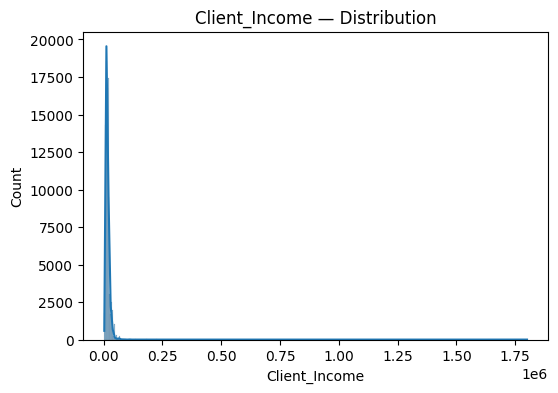

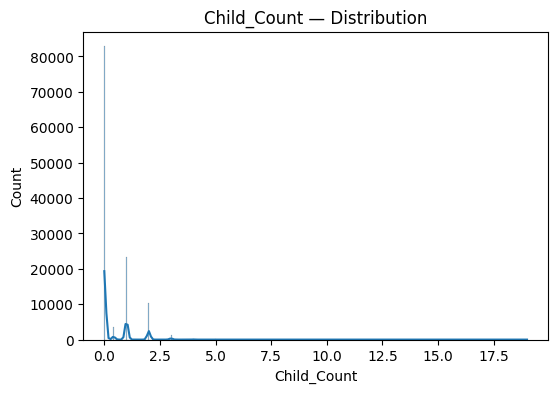

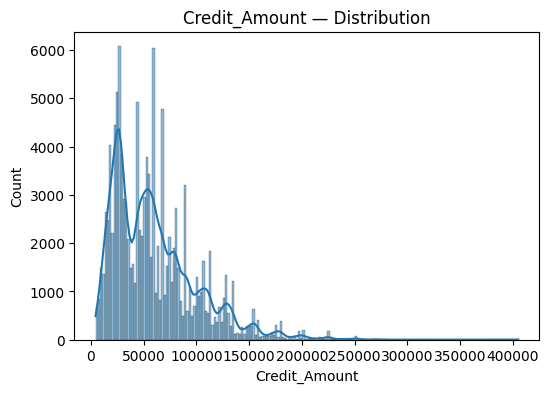

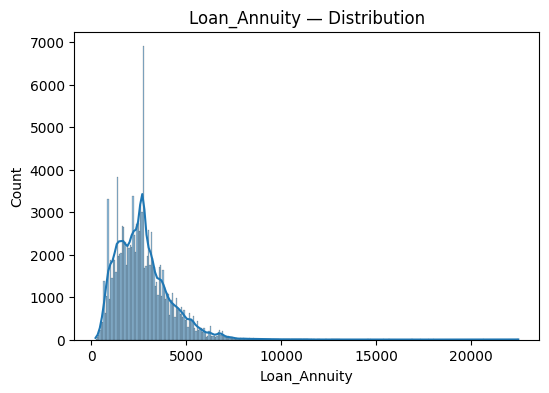

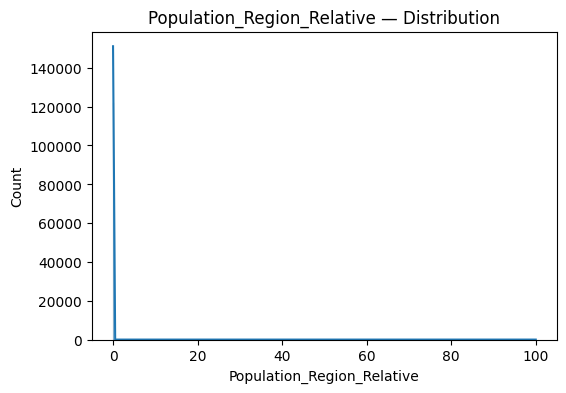

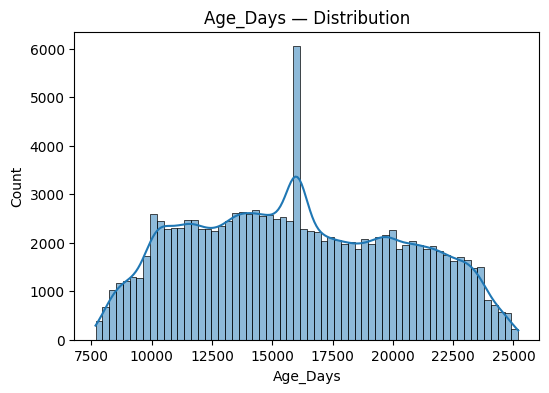

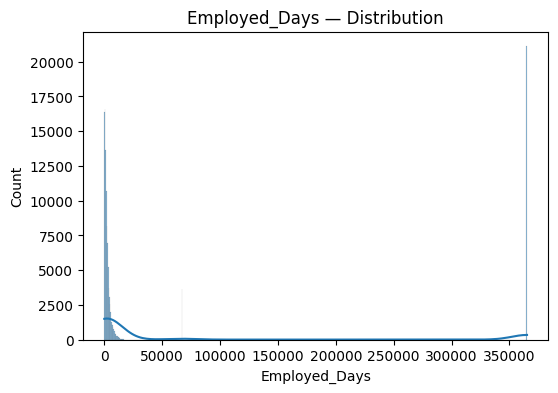

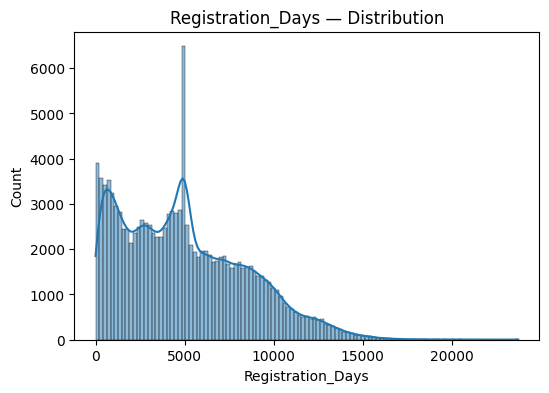

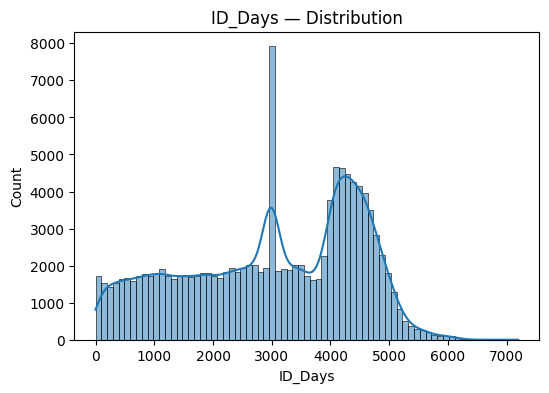

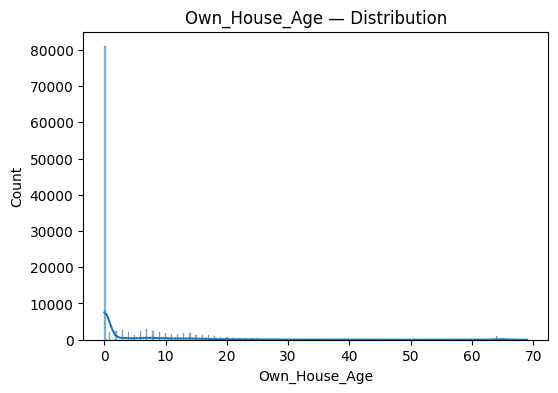

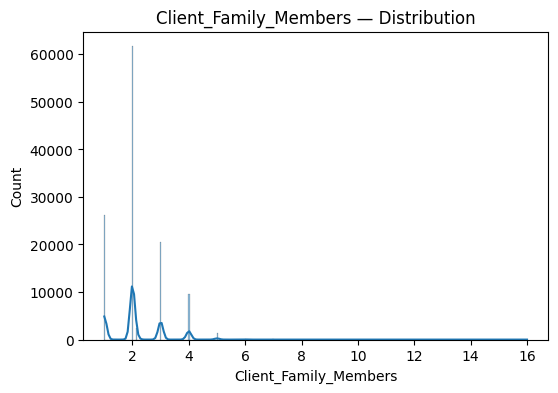

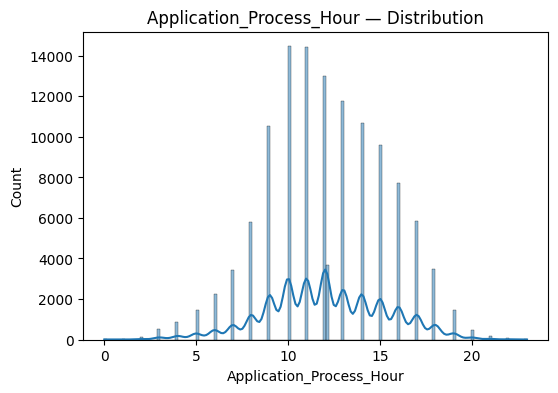

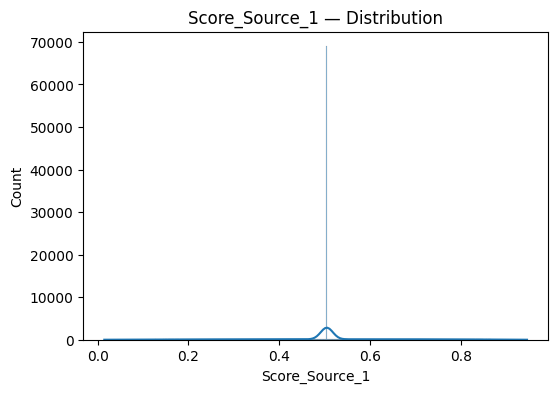

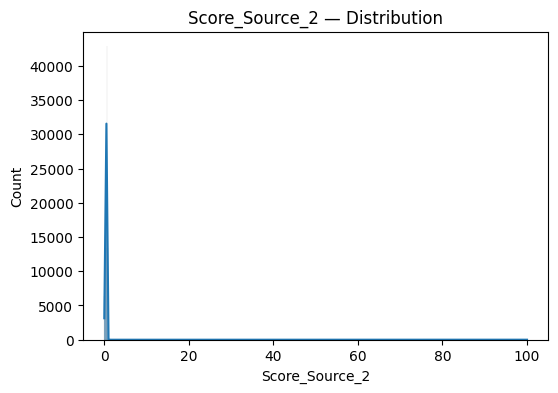

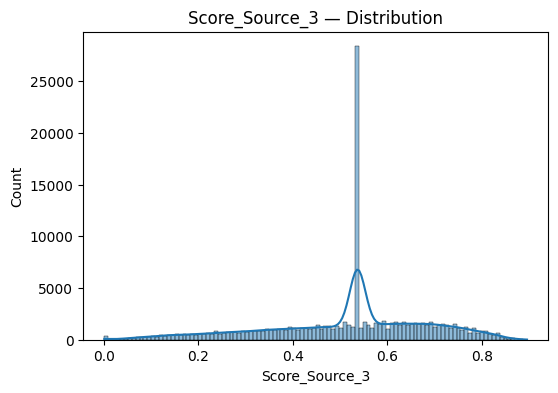

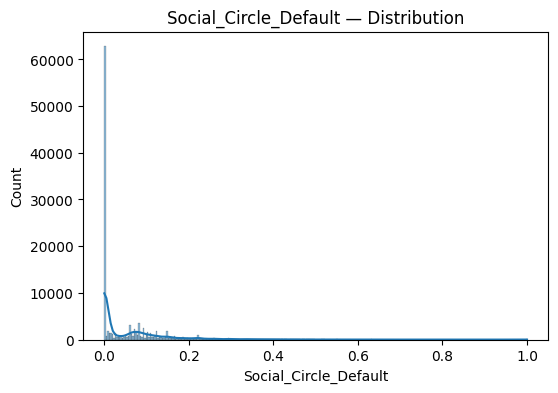

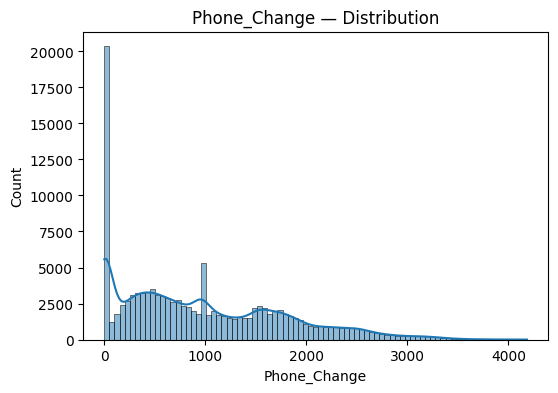

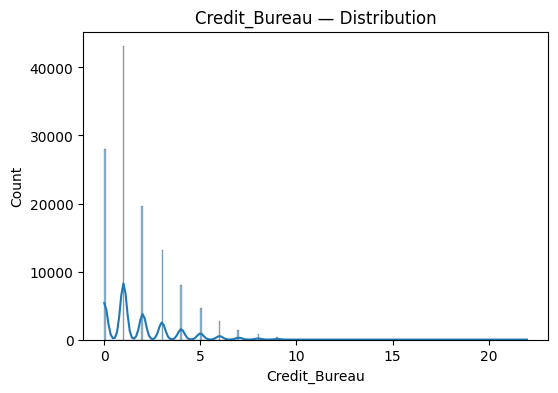

In [58]:
# plot histograms for numerical features, column-wise
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} — Distribution")
    plt.show()

#### Some columns are heavily skewed or have extreme outliers


In [59]:
# ['Child_Count', 'Credit_Amount', 'Client_Income', 'Population_Region_Relative', 'Employed_Days', 'Own_House_Age', 'Score_Source_2']

In [60]:
df['Child_Count'] = df['Child_Count'].clip(upper=8)
df['Credit_Amount'] = df['Credit_Amount'].clip(upper=df['Credit_Amount'].quantile(0.995))

# Cap at 40 years
df['Employed_Days'] = df['Employed_Days'].clip(upper=365 * 40)
df['Employed_Days'] = np.log1p(df['Employed_Days'])

df['Client_Income'] = df['Client_Income'].clip(upper=df['Client_Income'].quantile(0.995))
df['Client_Income'] = np.log1p(df['Client_Income'])

In [61]:
df['Population_Region_Relative'] = df['Population_Region_Relative'].clip(upper=1)
df['Population_Region_Relative'] = np.log1p(df['Population_Region_Relative'])

In [62]:
df['Score_Source_2'] = df['Score_Source_2'].clip(upper=df['Score_Source_2'].quantile(0.99))

In [63]:
df['Own_House_Age'].value_counts()

Own_House_Age
0.0     80954
7.0      3015
3.0      2555
6.0      2525
2.0      2321
8.0      2302
4.0      2175
9.0      2053
1.0      2041
10.0     1945
14.0     1855
13.0     1800
12.0     1692
11.0     1644
5.0      1433
15.0     1415
16.0     1347
17.0     1193
64.0      974
18.0      919
19.0      740
20.0      644
21.0      591
22.0      490
24.0      457
23.0      420
65.0      392
25.0      353
26.0      225
28.0      221
27.0      182
29.0      156
30.0      129
31.0      121
32.0       87
35.0       75
33.0       68
34.0       67
36.0       57
39.0       40
40.0       37
38.0       37
37.0       32
41.0       30
42.0       13
43.0       10
44.0        8
54.0        5
50.0        2
63.0        2
57.0        2
46.0        2
45.0        1
49.0        1
69.0        1
Name: count, dtype: int64

In [64]:
# bin house age
df['Own_House_Age_bin'] = pd.cut(
    df['Own_House_Age'],
    bins=[-0.1, 0.1, 5, 10, 20, 50, 100],
    labels=['none/unknown','1-5','5-10','10-20','20-50','50+']
)
df.drop(['Own_House_Age'], axis=1, inplace=True)
df['Own_House_Age_bin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 121856 entries, 0 to 121855
Series name: Own_House_Age_bin
Non-Null Count   Dtype   
--------------   -----   
121856 non-null  category
dtypes: category(1)
memory usage: 119.3 KB


In [65]:
age_order = {
    'none/unknown': 0,
    '1-5': 1,
    '5-10': 2,
    '10-20': 3,
    '20-50': 4,
    '50+': 5
}

df['Own_House_Age_bin'] = df['Own_House_Age_bin'].map(age_order).astype(int)

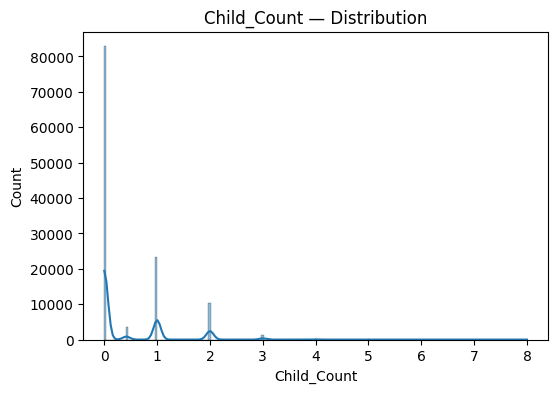

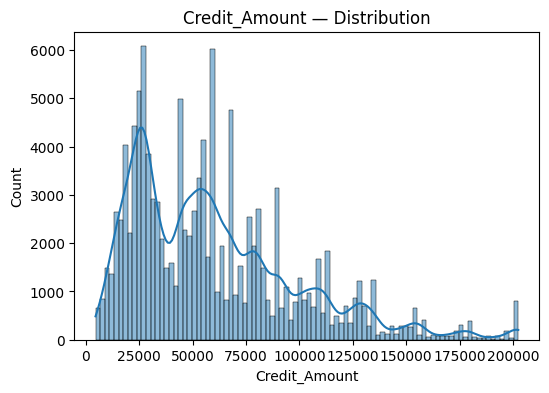

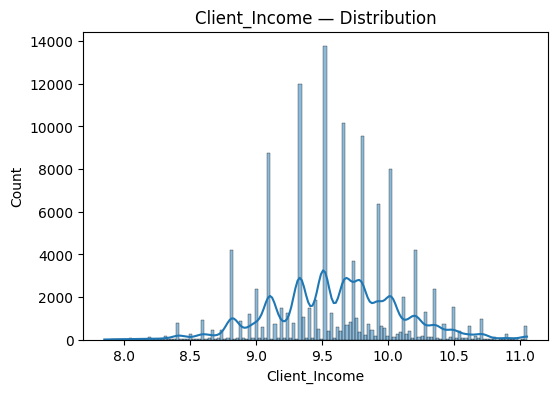

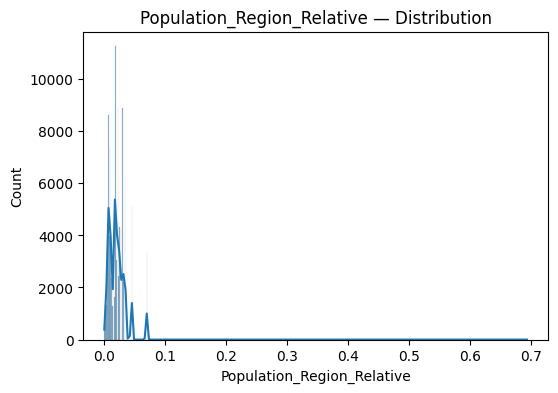

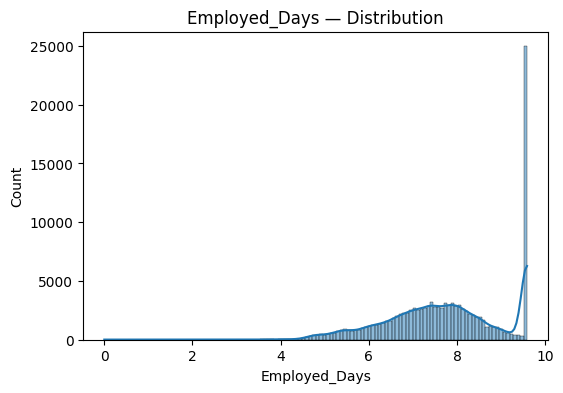

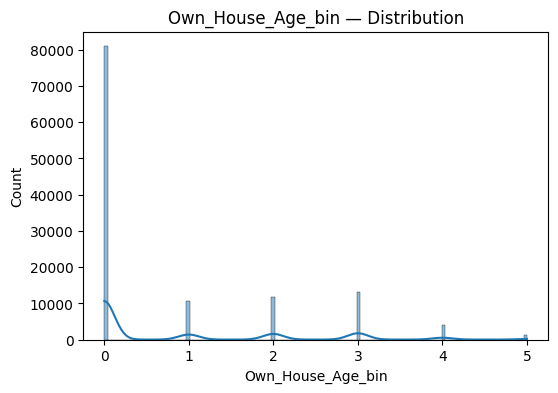

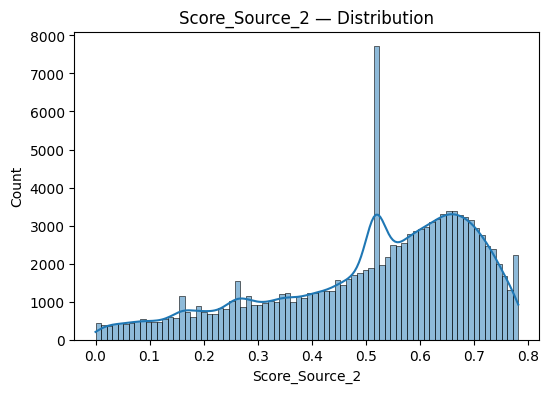

In [66]:
for col in ['Child_Count', 'Credit_Amount', 'Client_Income', 'Population_Region_Relative', 'Employed_Days', 'Own_House_Age_bin', 'Score_Source_2']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} — Distribution")
    plt.show()

### Categorical Features

In [67]:
print(categorical_cols)
print(len(categorical_cols))

['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation', 'Client_City_Rating', 'Application_Process_Day', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization', 'Own_House_Age_Missing', 'Score_Source_1_missing', 'Social_Circle_Default_missing', 'Score_Source_3_missing', 'Credit_Bureau_missing']
25


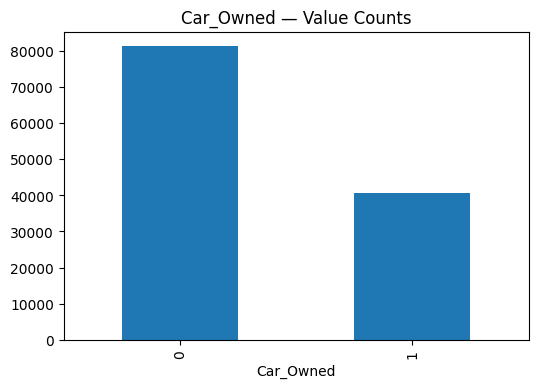

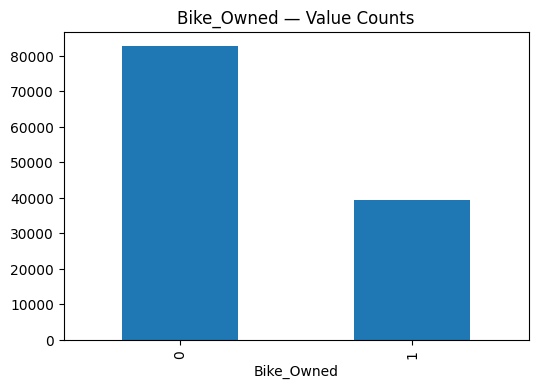

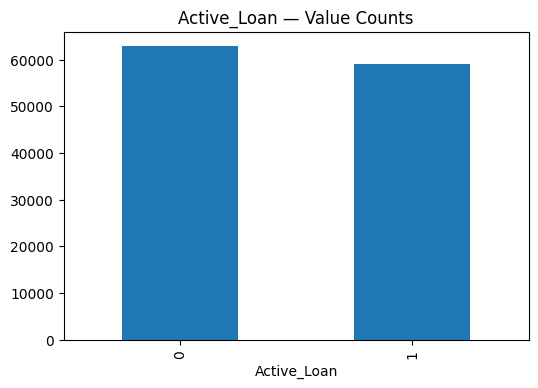

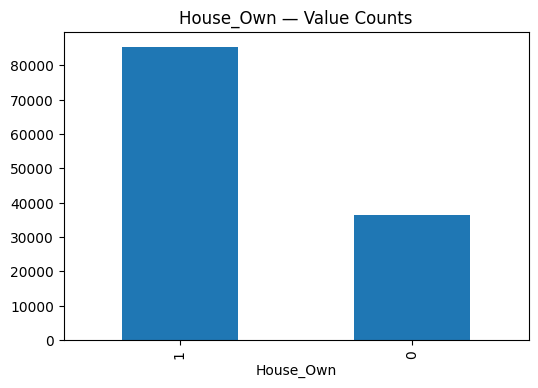

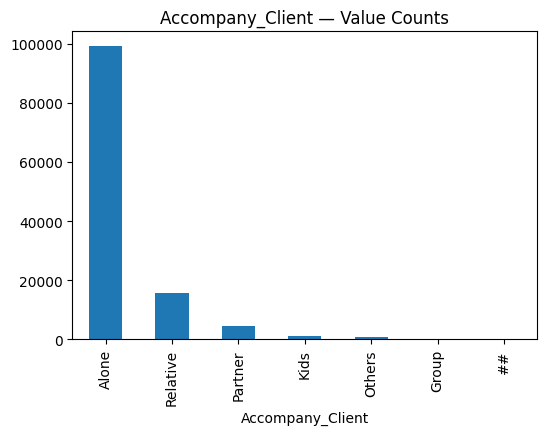

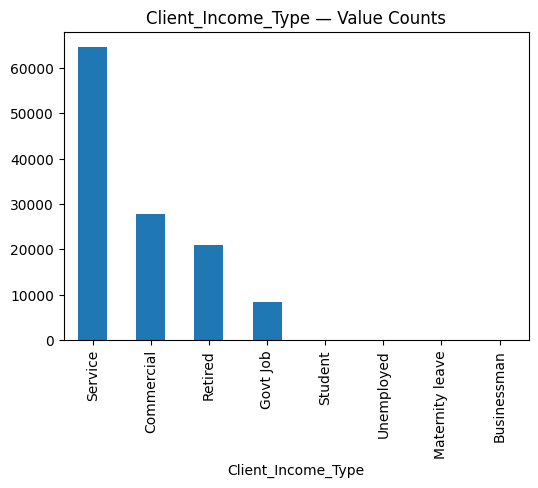

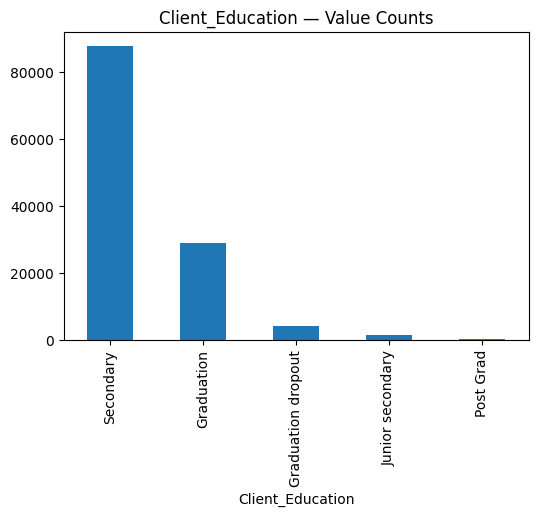

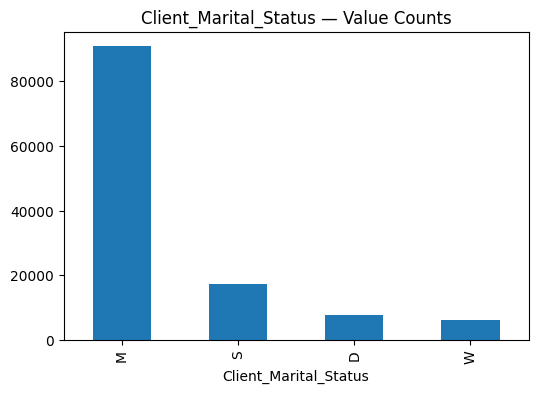

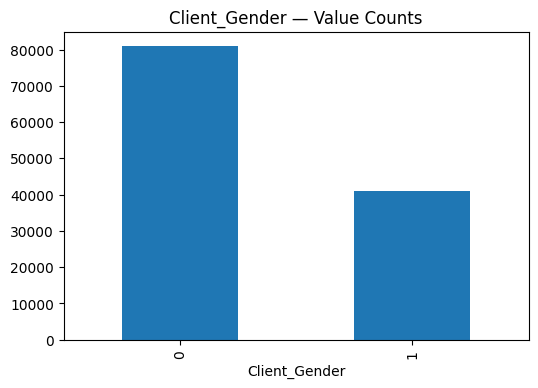

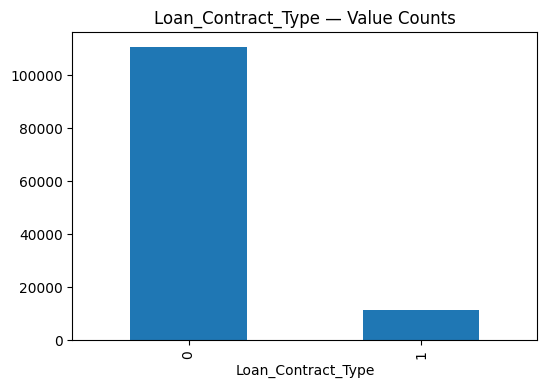

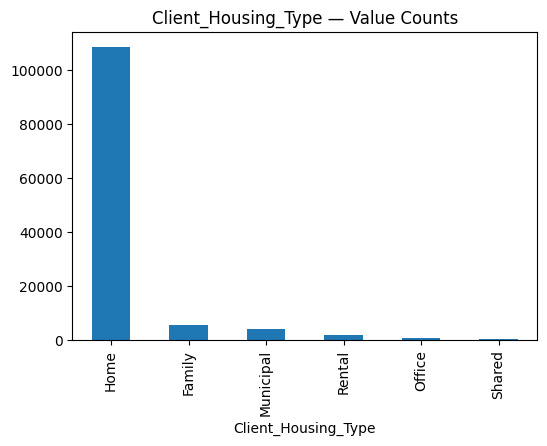

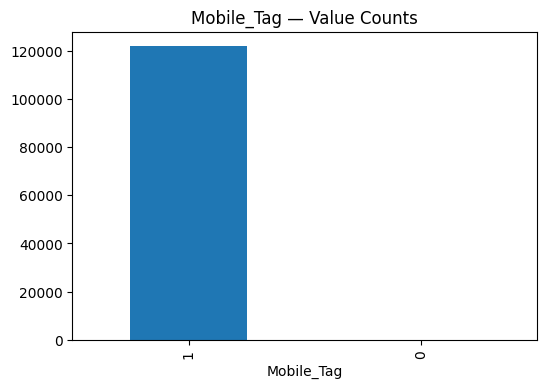

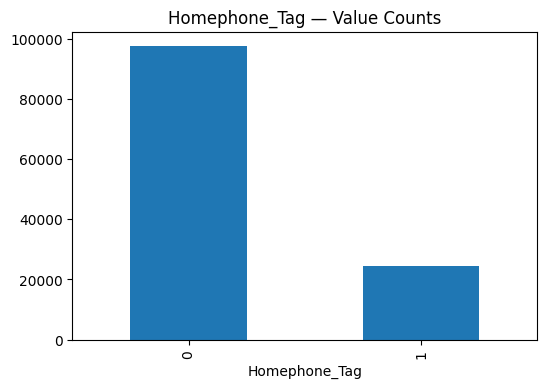

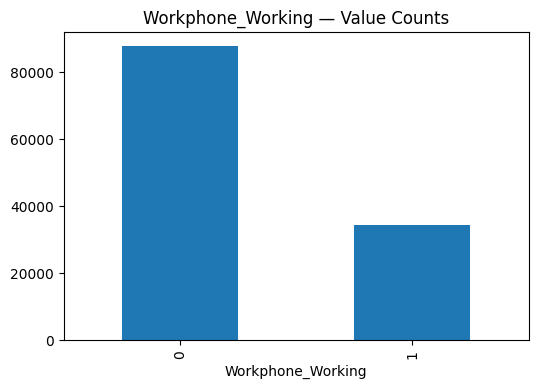

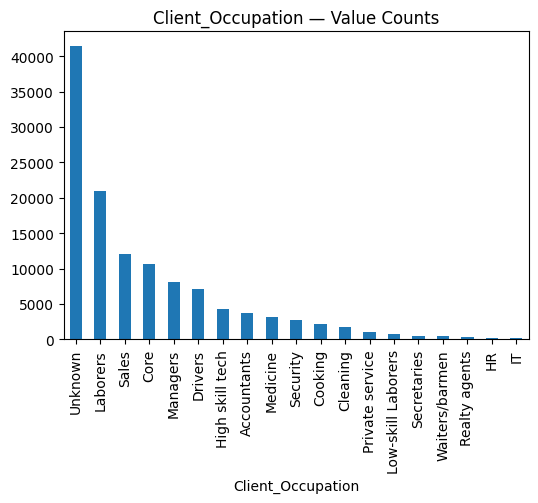

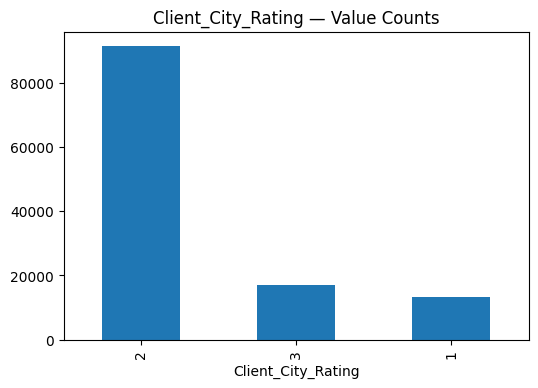

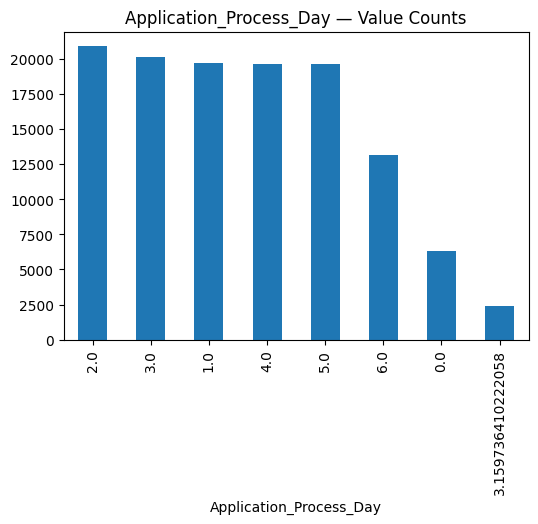

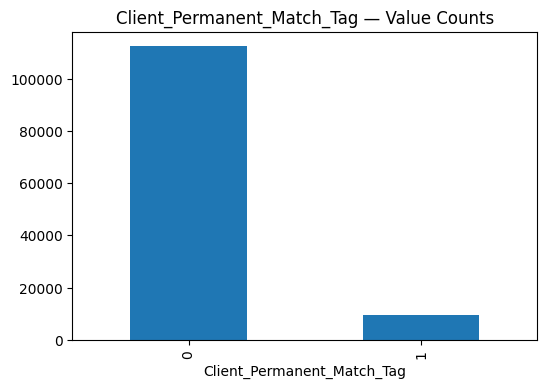

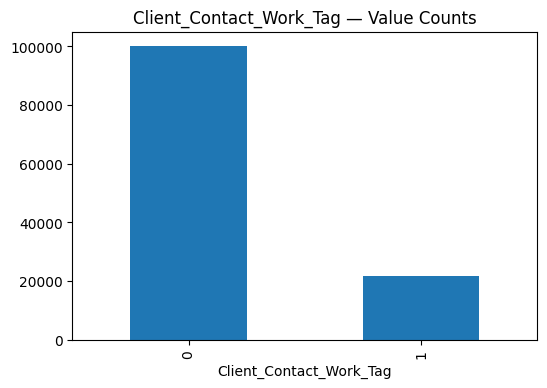

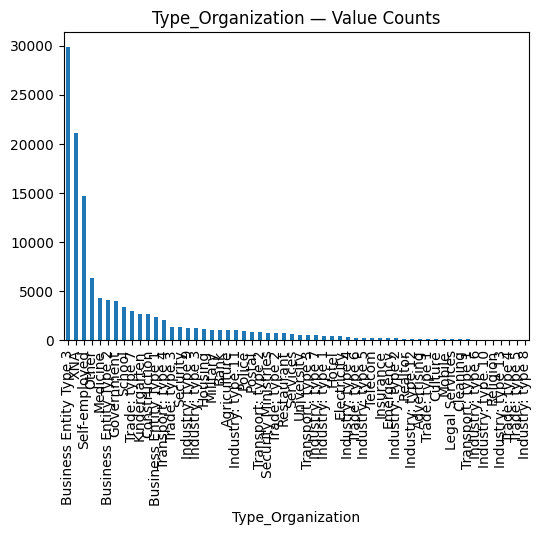

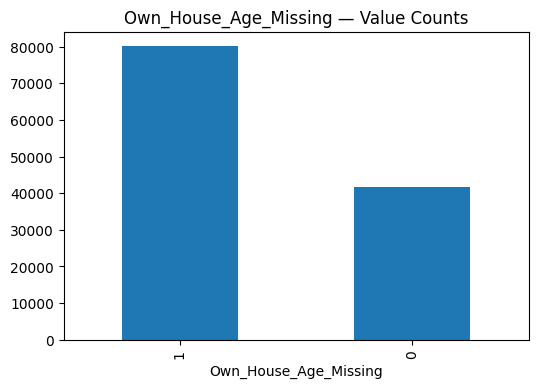

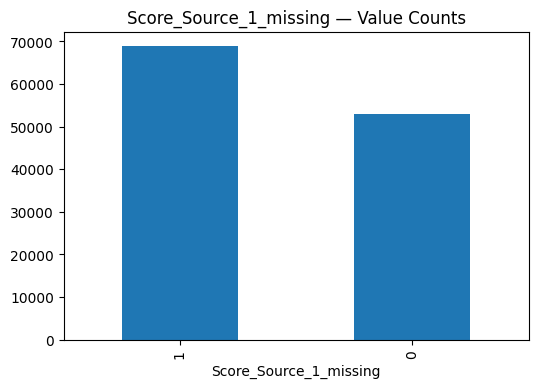

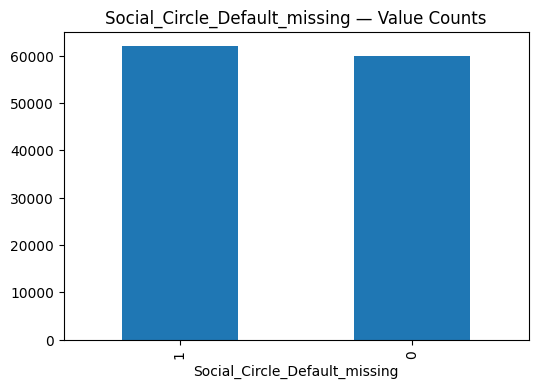

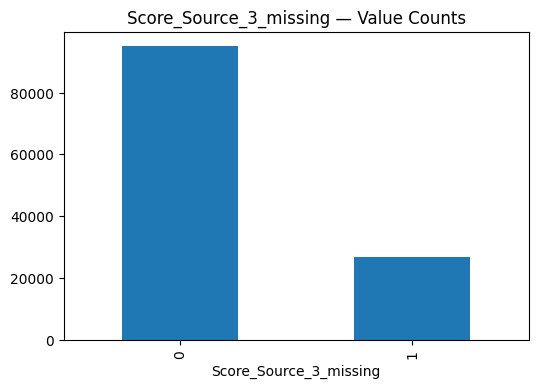

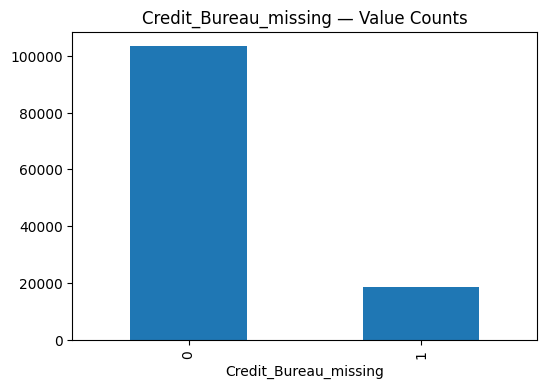

In [68]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} — Value Counts")
    plt.show()

#### Talking points
* Mobile_Tag - very few zeroes. Can't help modelling. Drop the column
* Default - obviously imbalanced
* Accompany_Client - Replace '##', Combine rare classes (Kids, Others, Group)
* Client_Income_client - Combine rare classes

In [69]:
df.drop(['Mobile_Tag'], inplace=True, axis=1)

In [70]:
rare_accompany = ['Kids','Others','Group', '##']
df.loc[:,'Accompany_Client'] = df.loc[:,'Accompany_Client'].replace(rare_accompany, "Other")

In [71]:
rare_income = ['Student','Unemployed','Maternity leave','Businessman']
df.loc[:,'Client_Income_Type'] = df['Client_Income_Type'].replace(rare_income, "Other")

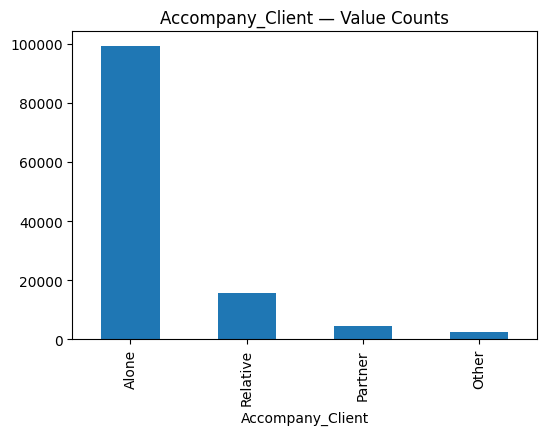

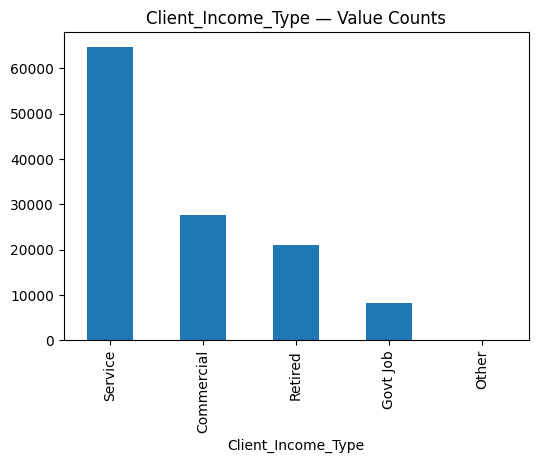

In [72]:
for col in ['Accompany_Client', 'Client_Income_Type']:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} — Value Counts")
    plt.show()

In [73]:
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/dataset_cleaned_v1.5.csv", index=False)

## Phase 3

### Bivariate Analysis

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [75]:
df = pd.read_csv("../data/processed/dataset_cleaned_v1.5.csv")

In [76]:
df['ID'] = df['ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID                             121856 non-null  object 
 1   Client_Income                  121856 non-null  float64
 2   Car_Owned                      121856 non-null  int64  
 3   Bike_Owned                     121856 non-null  int64  
 4   Active_Loan                    121856 non-null  int64  
 5   House_Own                      121856 non-null  int64  
 6   Child_Count                    121856 non-null  float64
 7   Credit_Amount                  121856 non-null  float64
 8   Loan_Annuity                   121856 non-null  float64
 9   Accompany_Client               121856 non-null  object 
 10  Client_Income_Type             121856 non-null  object 
 11  Client_Education               121856 non-null  object 
 12  Client_Marital_Status         

In [77]:
binary_cols = [col for col in df.columns if col!='Default' and df[col].nunique(dropna=True) == 2]

# convert all binary columns except 'Default' to Category
for col in binary_cols:
    # Convert to int if bool-like
    df[col] = df[col].astype(int)
    df[col] = df[col].astype('category')

df['Client_City_Rating'] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   ID                             121856 non-null  object  
 1   Client_Income                  121856 non-null  float64 
 2   Car_Owned                      121856 non-null  category
 3   Bike_Owned                     121856 non-null  category
 4   Active_Loan                    121856 non-null  category
 5   House_Own                      121856 non-null  category
 6   Child_Count                    121856 non-null  float64 
 7   Credit_Amount                  121856 non-null  float64 
 8   Loan_Annuity                   121856 non-null  float64 
 9   Accompany_Client               121856 non-null  object  
 10  Client_Income_Type             121856 non-null  object  
 11  Client_Education               121856 non-null  object  
 12  Client_Marital_S

In [78]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols.remove('ID')

#### Numerical features vs target


==== Client_Income ====
Default
0    9.664659
1    9.575053
Name: Client_Income, dtype: float64


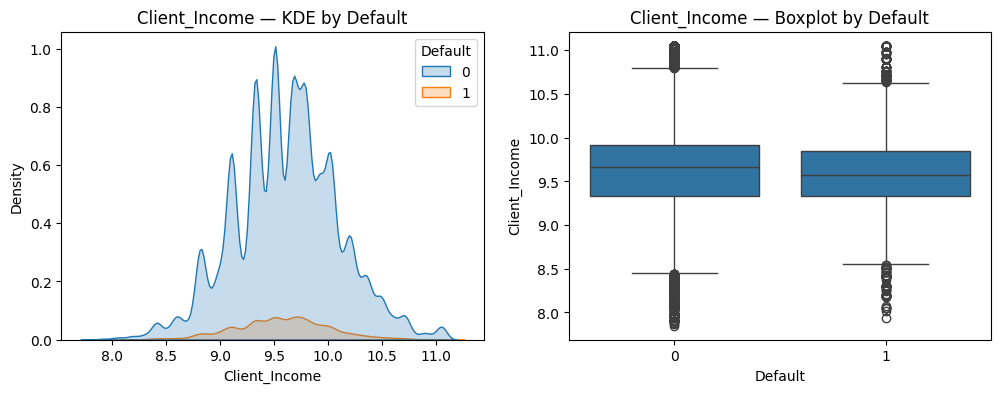


==== Child_Count ====
Default
0    0.0
1    0.0
Name: Child_Count, dtype: float64


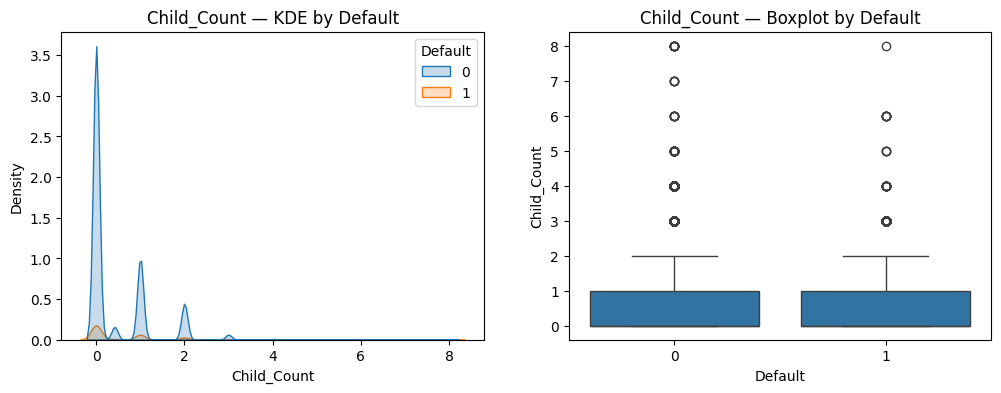


==== Credit_Amount ====
Default
0    52649.1
1    50940.0
Name: Credit_Amount, dtype: float64


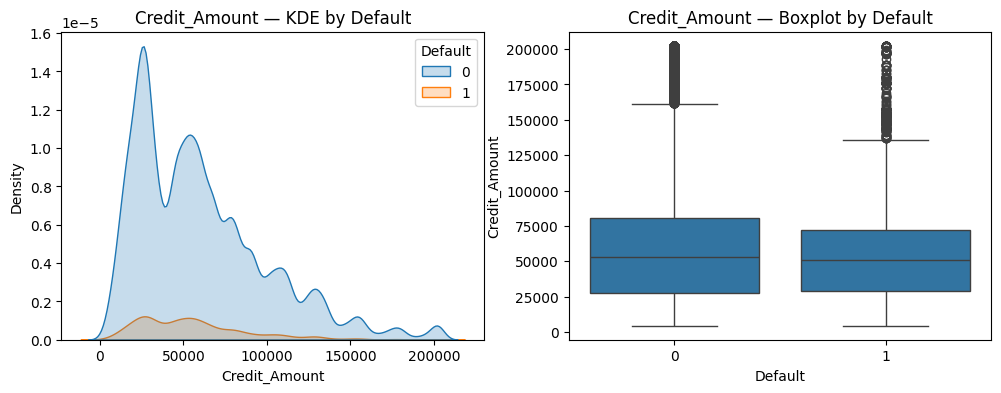


==== Loan_Annuity ====
Default
0    2559.15
1    2572.65
Name: Loan_Annuity, dtype: float64


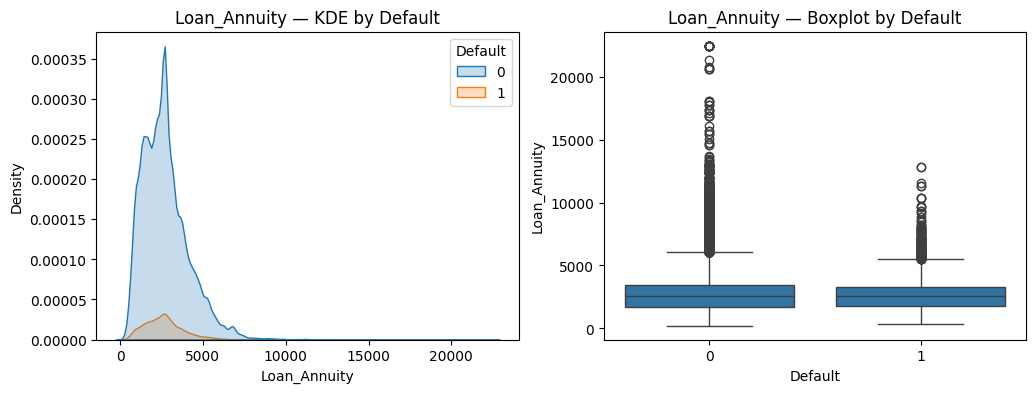


==== Population_Region_Relative ====
Default
0    0.018921
1    0.018626
Name: Population_Region_Relative, dtype: float64


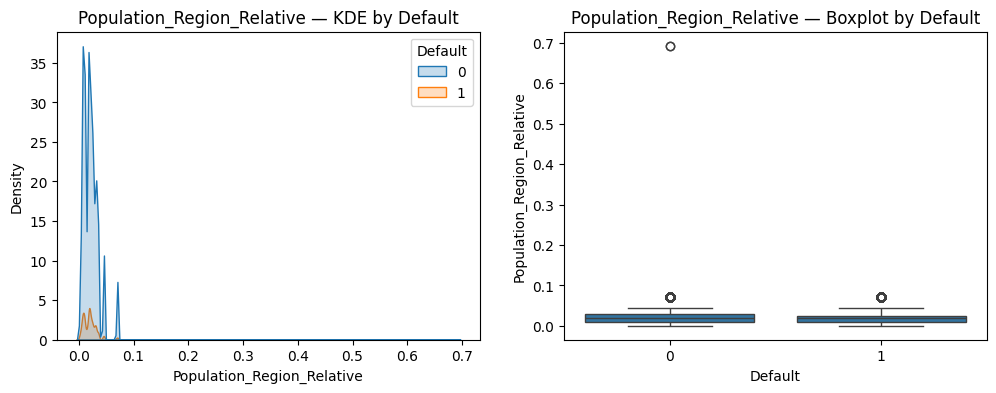


==== Age_Days ====
Default
0    16027.422948
1    14582.000000
Name: Age_Days, dtype: float64


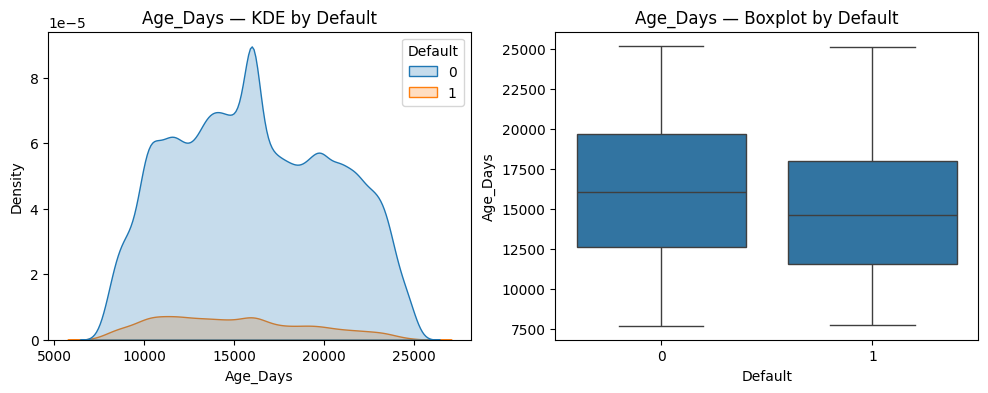


==== Employed_Days ====
Default
0    7.786136
1    7.325808
Name: Employed_Days, dtype: float64


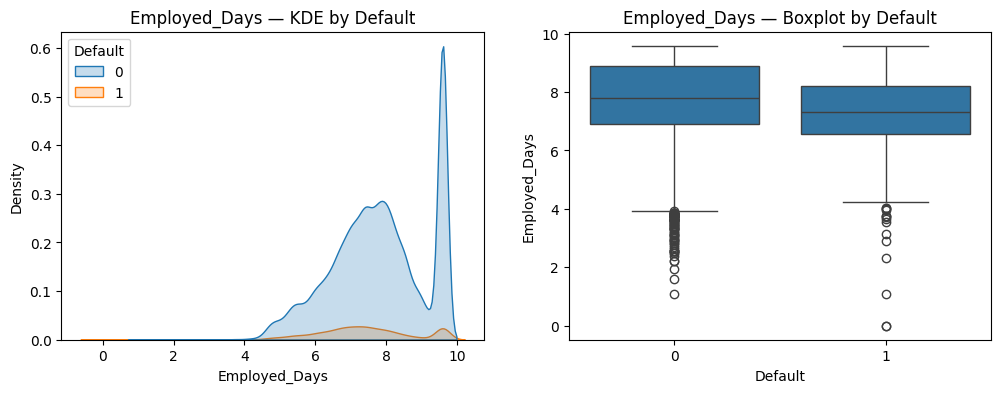


==== Registration_Days ====
Default
0    4667.0
1    4184.0
Name: Registration_Days, dtype: float64


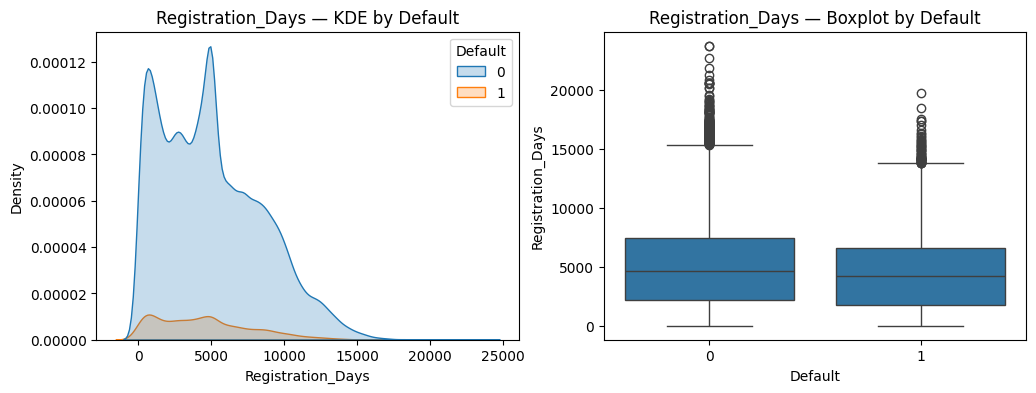


==== ID_Days ====
Default
0    3128.0
1    2940.0
Name: ID_Days, dtype: float64


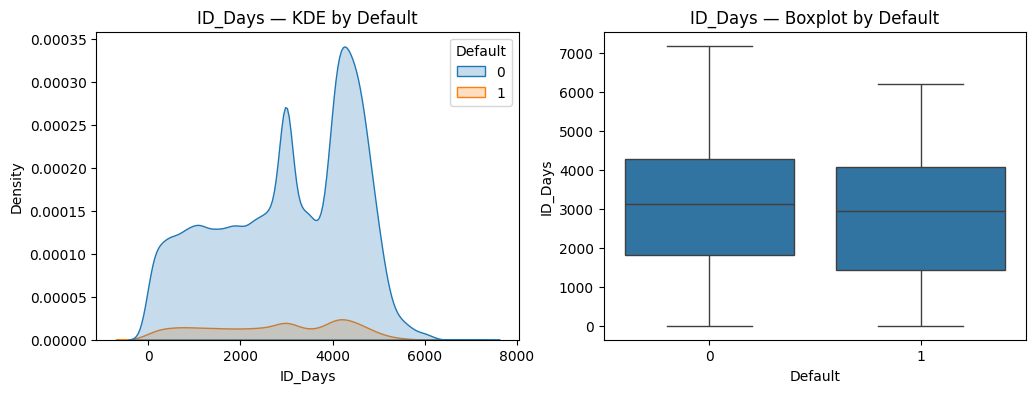


==== Client_Family_Members ====
Default
0    2.0
1    2.0
Name: Client_Family_Members, dtype: float64


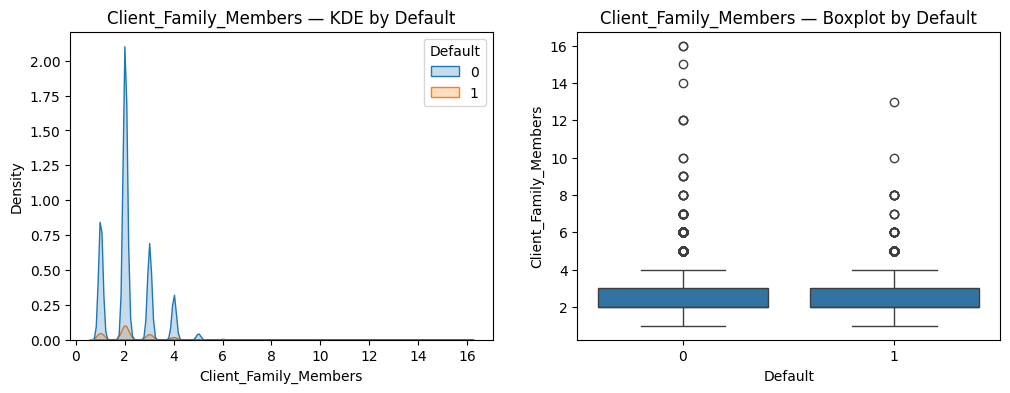


==== Application_Process_Day ====
Default
0    3.0
1    3.0
Name: Application_Process_Day, dtype: float64


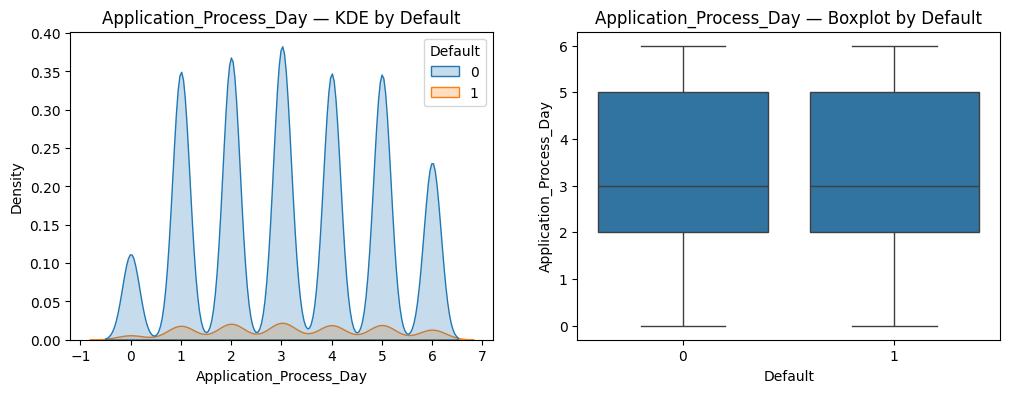


==== Application_Process_Hour ====
Default
0    12.0
1    12.0
Name: Application_Process_Hour, dtype: float64


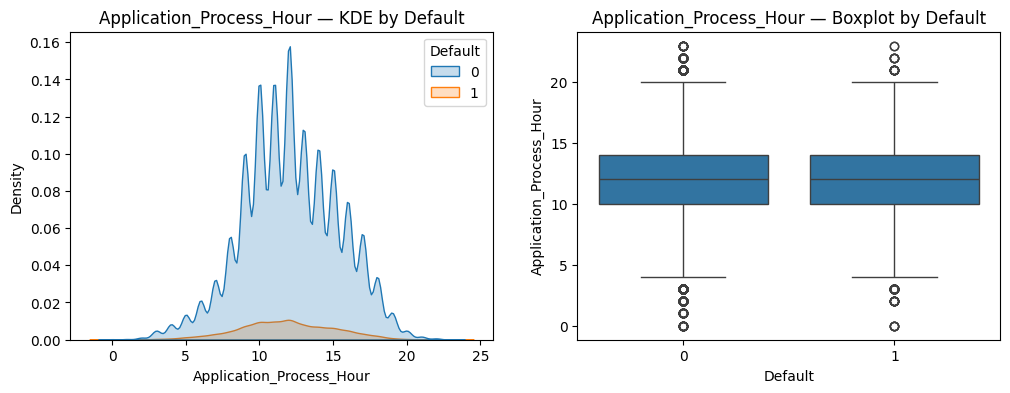


==== Score_Source_1 ====
Default
0    0.504657
1    0.504657
Name: Score_Source_1, dtype: float64


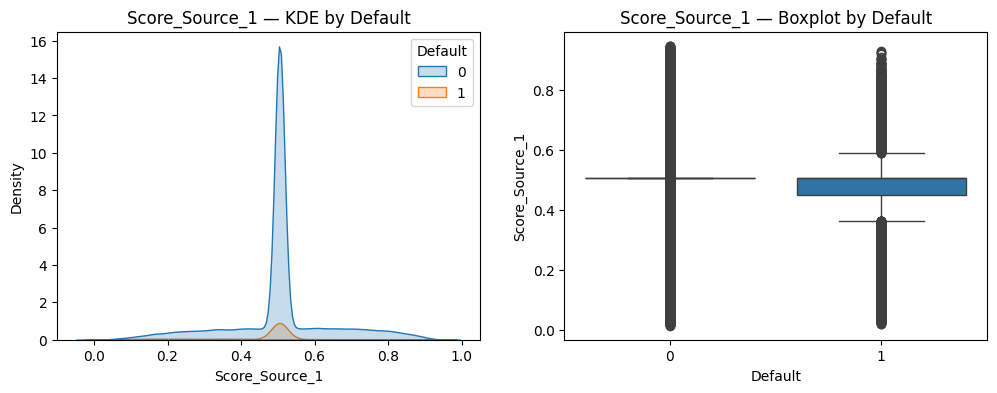


==== Score_Source_2 ====
Default
0    0.561212
1    0.458804
Name: Score_Source_2, dtype: float64


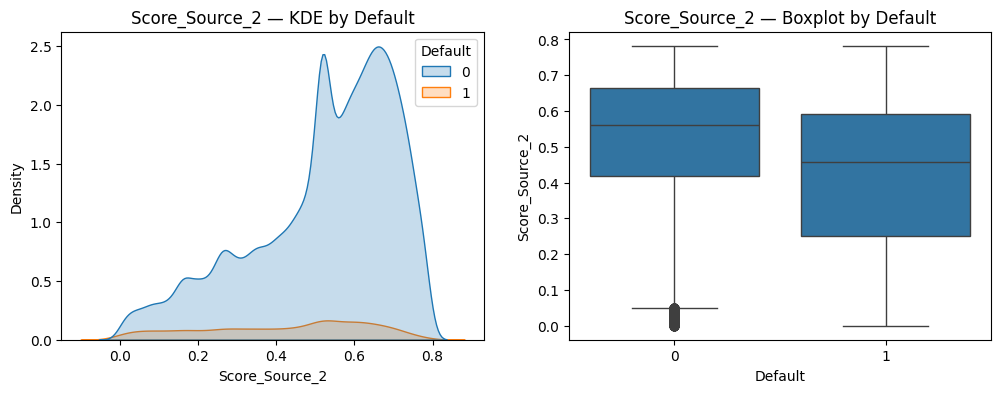


==== Score_Source_3 ====
Default
0    0.53707
1    0.49206
Name: Score_Source_3, dtype: float64


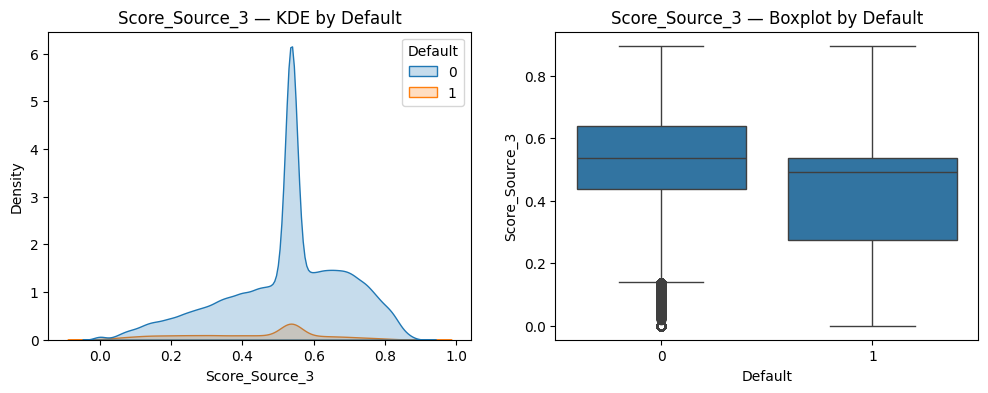


==== Social_Circle_Default ====
Default
0    0.0
1    0.0
Name: Social_Circle_Default, dtype: float64


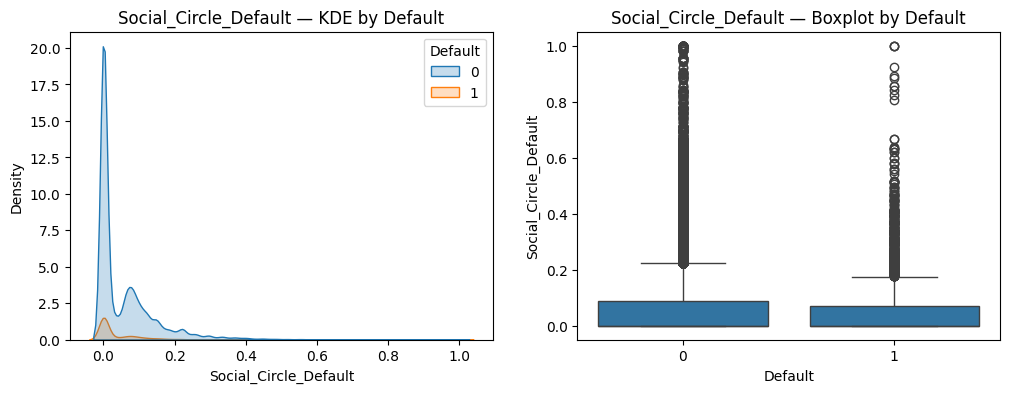


==== Phone_Change ====
Default
0    814.0
1    617.0
Name: Phone_Change, dtype: float64


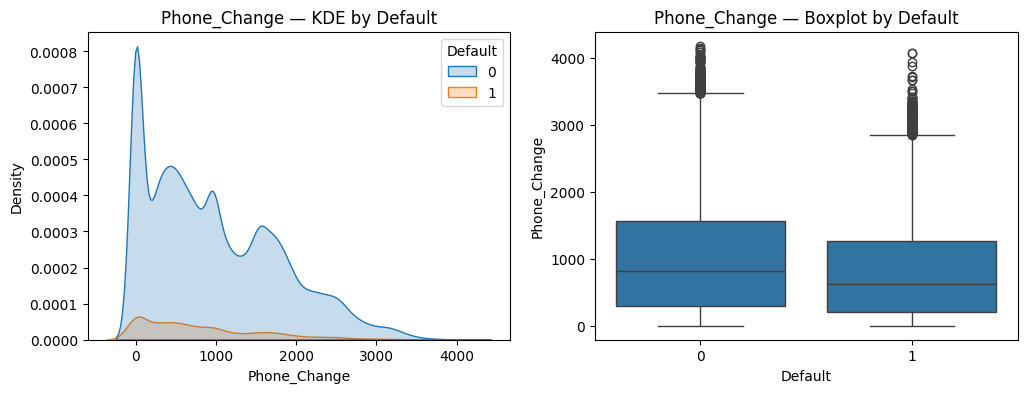


==== Credit_Bureau ====
Default
0    1.0
1    1.0
Name: Credit_Bureau, dtype: float64


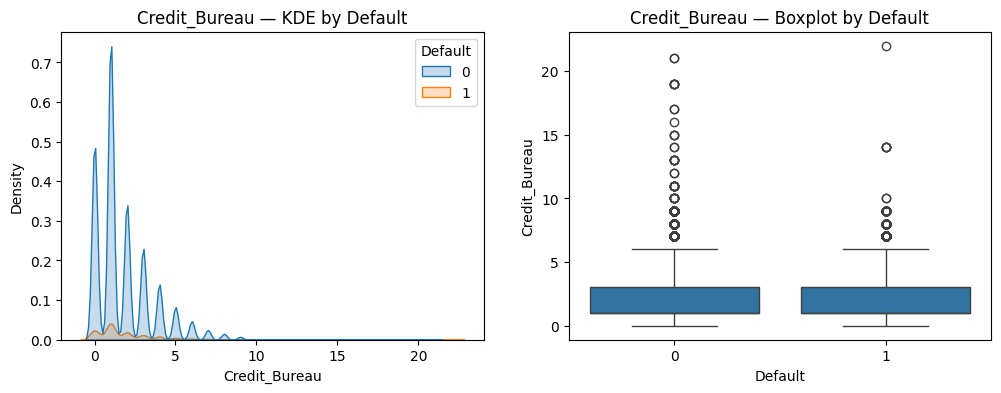


==== Default ====
Default
0    0.0
1    1.0
Name: Default, dtype: float64


C:\Users\ompan\AppData\Local\Temp\ipykernel_21444\415217052.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='Default', ax=axes[0], fill=True)


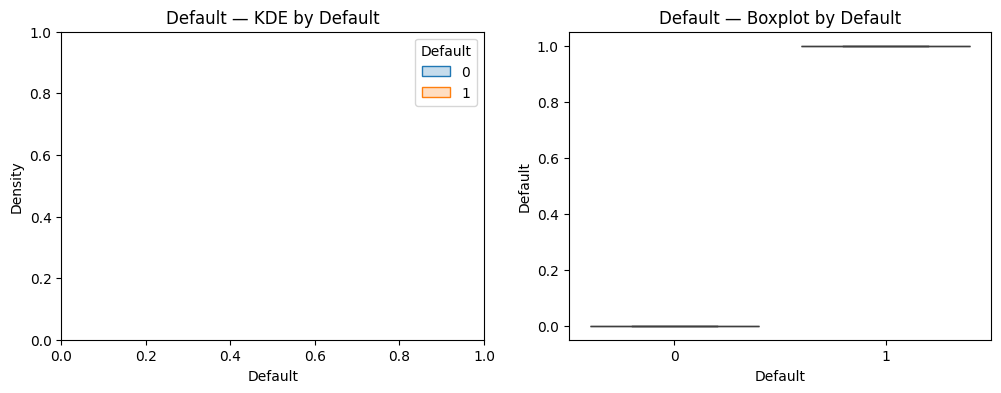


==== Own_House_Age_bin ====
Default
0    0.0
1    0.0
Name: Own_House_Age_bin, dtype: float64


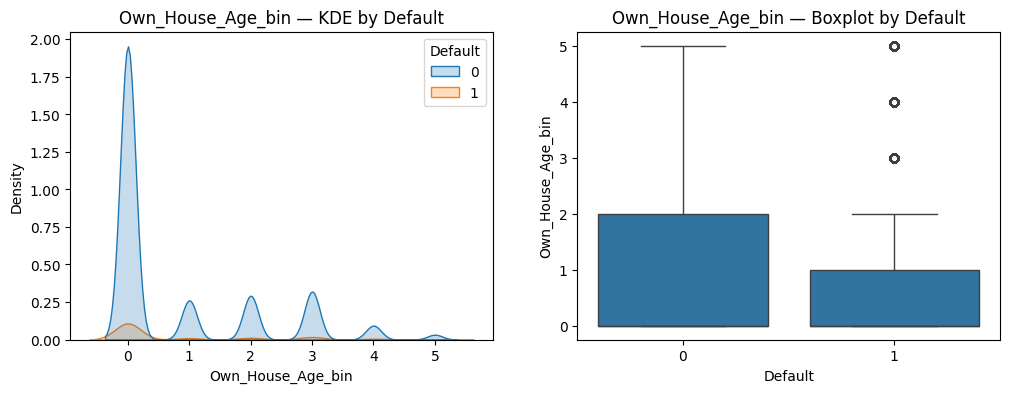

In [79]:
for col in numeric_cols:
    print(f"\n==== {col} ====")
    print(df.groupby('Default')[col].median())

    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # KDE distributions
    sns.kdeplot(data=df, x=col, hue='Default', ax=axes[0], fill=True)
    axes[0].set_title(f"{col} — KDE by Default")

    # Boxplot
    sns.boxplot(x='Default', y=col, data=df, ax=axes[1])
    axes[1].set_title(f"{col} — Boxplot by Default")

    plt.show()

#### Categorical Columns

In [80]:
categorical_cols = [x for x in categorical_cols if x not in ["Mobile_Tag", "Default"]]
print(categorical_cols)

['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation', 'Client_City_Rating', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization', 'Own_House_Age_Missing', 'Score_Source_1_missing', 'Social_Circle_Default_missing', 'Score_Source_3_missing', 'Credit_Bureau_missing']



==================== Car_Owned ====================
Car_Owned
0    0.085136
1    0.072082
Name: Default, dtype: float64

Counts:
Car_Owned
0    81305
1    40551
Name: count, dtype: int64


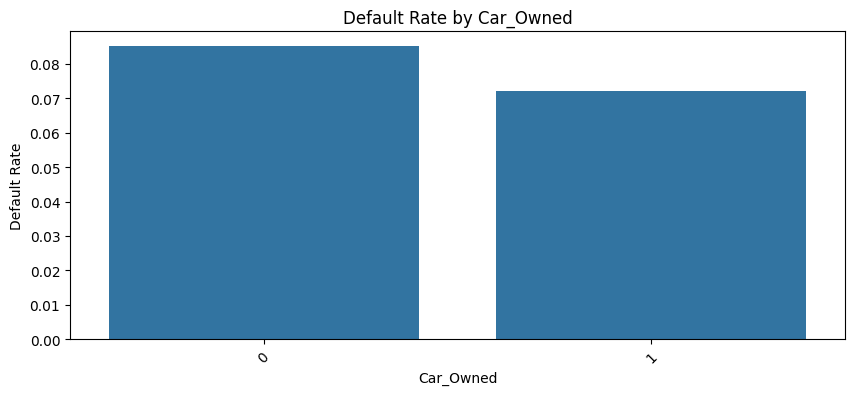


==================== Bike_Owned ====================
Bike_Owned
0    0.080875
1    0.080618
Name: Default, dtype: float64

Counts:
Bike_Owned
0    82572
1    39284
Name: count, dtype: int64


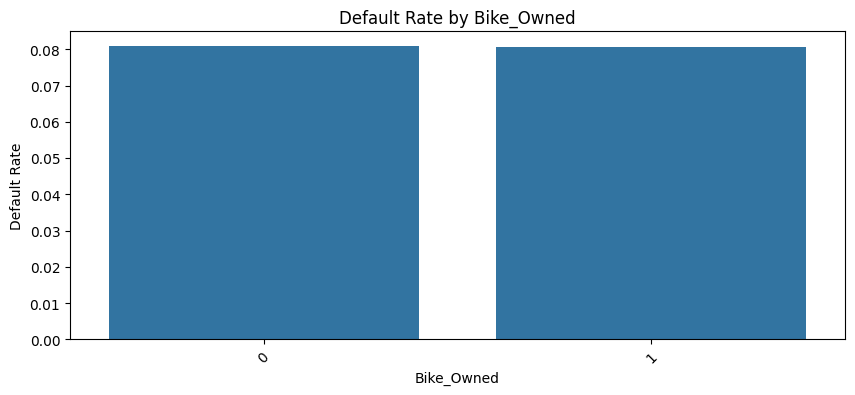


==================== Active_Loan ====================
Active_Loan
1    0.080813
0    0.080773
Name: Default, dtype: float64

Counts:
Active_Loan
0    62843
1    59013
Name: count, dtype: int64


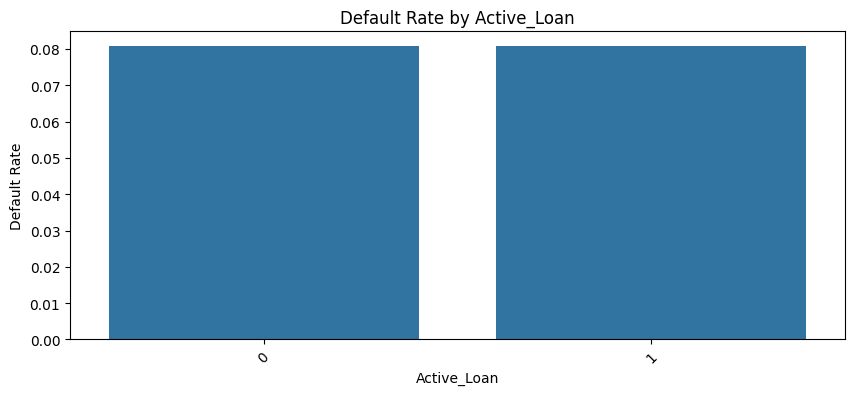


==================== House_Own ====================
House_Own
0    0.081051
1    0.080682
Name: Default, dtype: float64

Counts:
House_Own
1    85459
0    36397
Name: count, dtype: int64


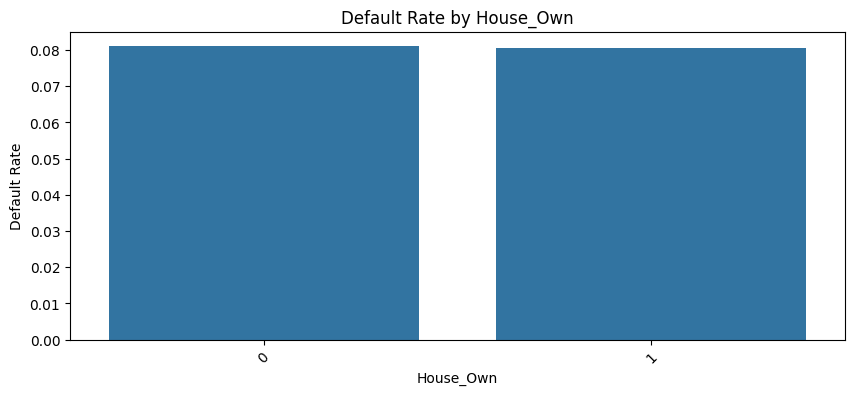


==================== Accompany_Client ====================
Accompany_Client
Alone       0.082013
Partner     0.079274
Other       0.075503
Relative    0.074359
Name: Default, dtype: float64

Counts:
Accompany_Client
Alone       99155
Relative    15748
Partner      4516
Other        2437
Name: count, dtype: int64


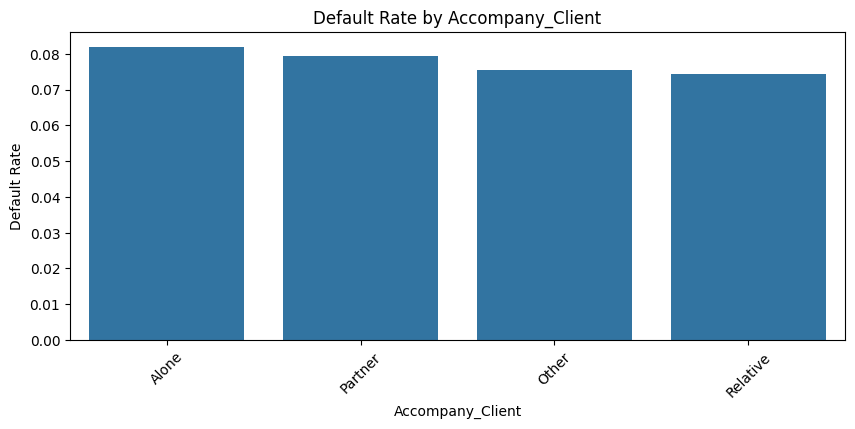


==================== Client_Income_Type ====================
Client_Income_Type
Other         0.176471
Service       0.094007
Commercial    0.075890
Govt Job      0.058292
Retired       0.055410
Name: Default, dtype: float64

Counts:
Client_Income_Type
Service       64729
Commercial    27764
Retired       21043
Govt Job       8303
Other            17
Name: count, dtype: int64


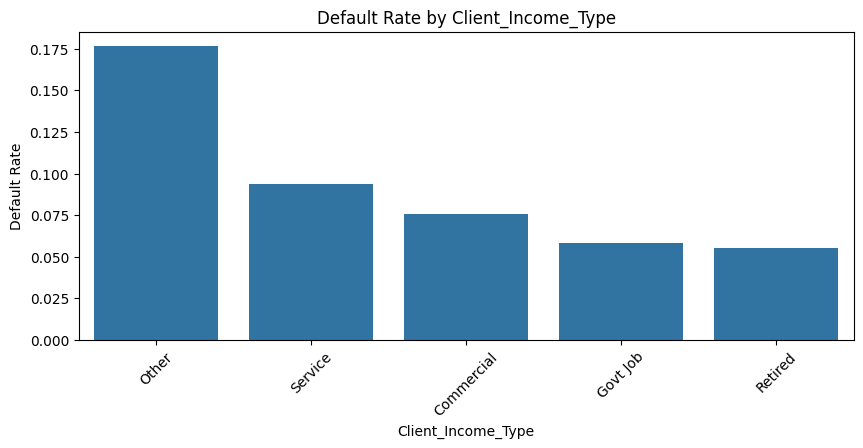


==================== Client_Education ====================
Client_Education
Junior secondary      0.105155
Secondary             0.090205
Graduation dropout    0.082828
Graduation            0.050835
Post Grad             0.015152
Name: Default, dtype: float64

Counts:
Client_Education
Secondary             87556
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: count, dtype: int64


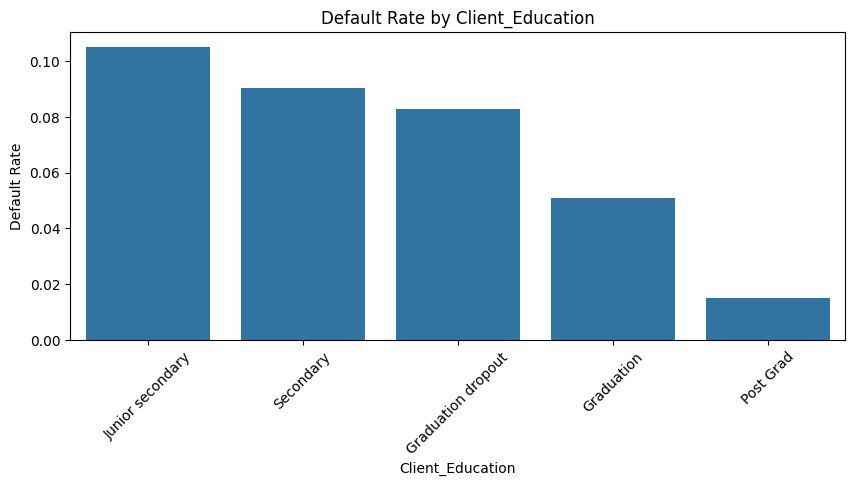


==================== Client_Marital_Status ====================
Client_Marital_Status
S    0.096989
M    0.079067
D    0.077290
W    0.064537
Name: Default, dtype: float64

Counts:
Client_Marital_Status
M    90822
S    17404
D     7556
W     6074
Name: count, dtype: int64


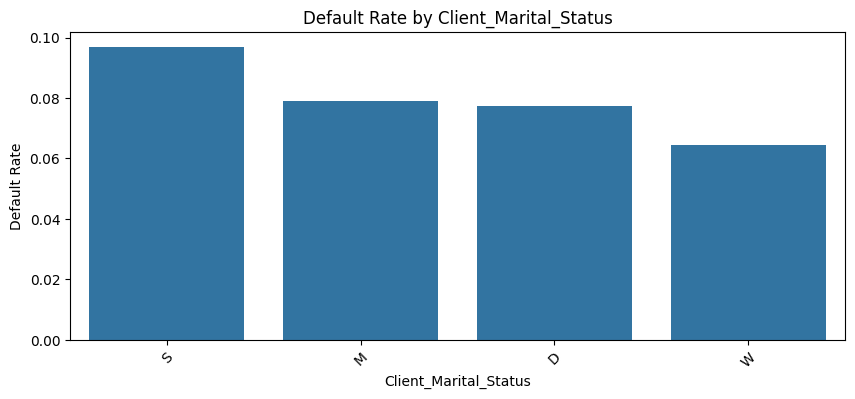


==================== Client_Gender ====================
Client_Gender
1    0.100154
0    0.070983
Name: Default, dtype: float64

Counts:
Client_Gender
0    80879
1    40977
Name: count, dtype: int64


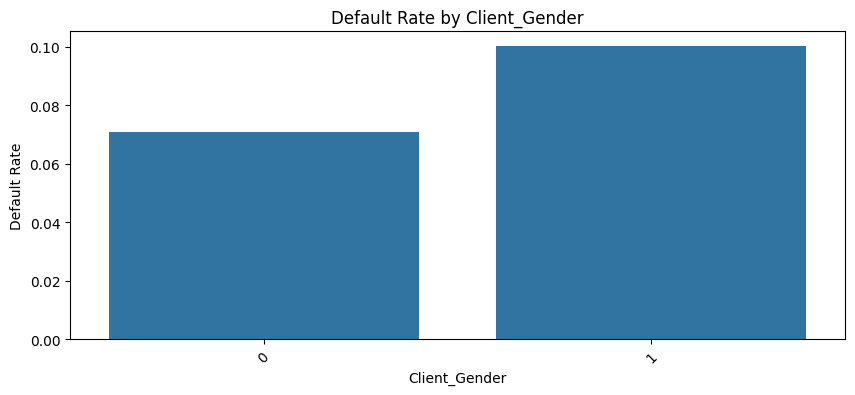


==================== Loan_Contract_Type ====================
Loan_Contract_Type
0    0.083128
1    0.057455
Name: Default, dtype: float64

Counts:
Loan_Contract_Type
0    110769
1     11087
Name: count, dtype: int64


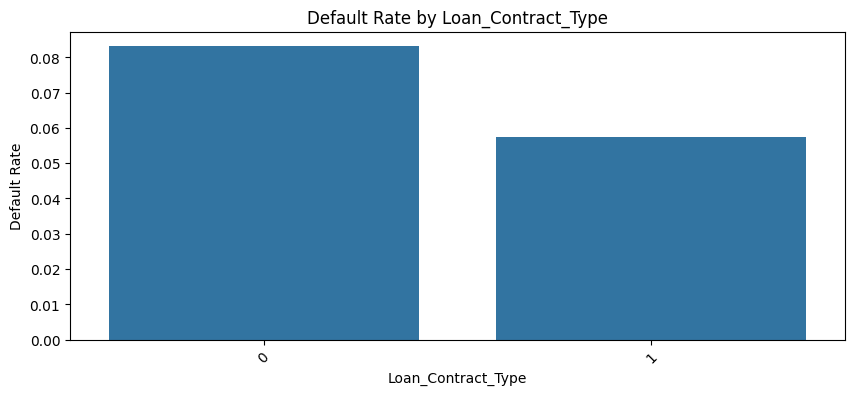


==================== Client_Housing_Type ====================
Client_Housing_Type
Rental       0.126101
Family       0.112398
Shared       0.100000
Municipal    0.088748
Home         0.078079
Office       0.067864
Name: Default, dtype: float64

Counts:
Client_Housing_Type
Home         108557
Family         5783
Municipal      4248
Rental         1816
Office         1002
Shared          450
Name: count, dtype: int64


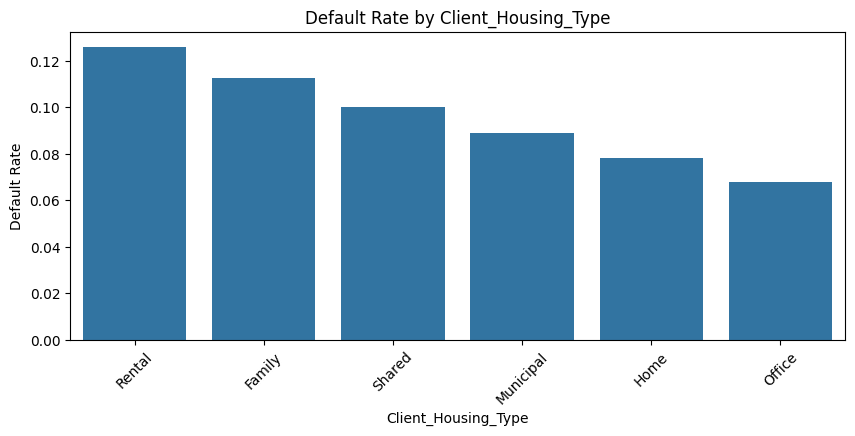


==================== Homephone_Tag ====================
Homephone_Tag
1    0.092543
0    0.077845
Name: Default, dtype: float64

Counts:
Homephone_Tag
0    97424
1    24432
Name: count, dtype: int64


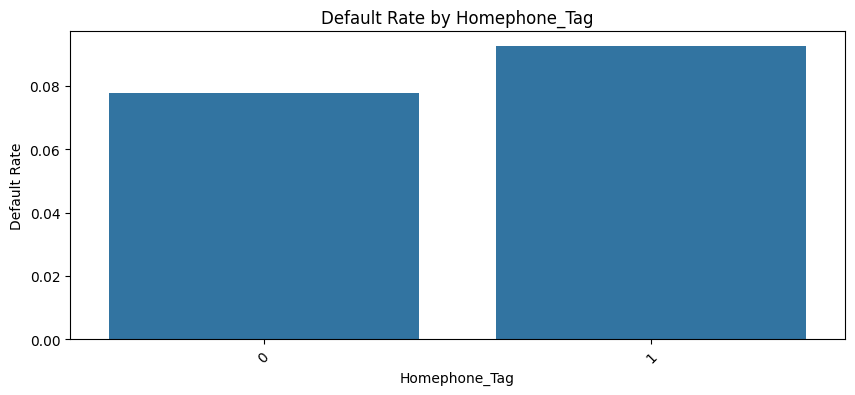


==================== Workphone_Working ====================
Workphone_Working
0    0.085170
1    0.069603
Name: Default, dtype: float64

Counts:
Workphone_Working
0    87590
1    34266
Name: count, dtype: int64


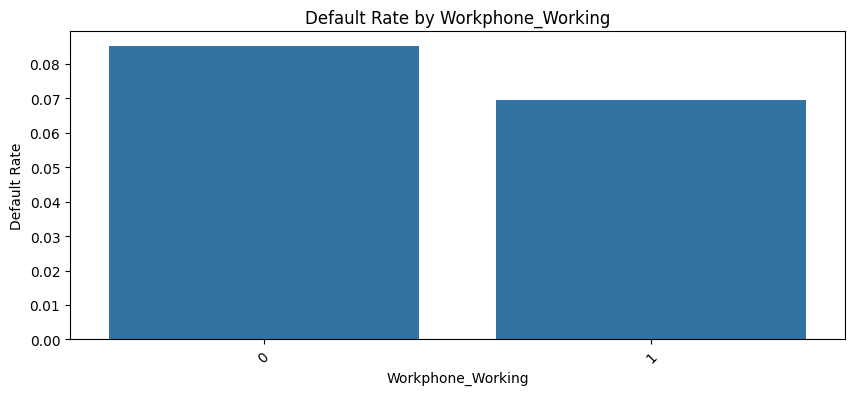


==================== Client_Occupation ====================
Client_Occupation
Low-skill Laborers    0.171537
Security              0.112933
Cooking               0.111960
Drivers               0.110490
Laborers              0.104595
Waiters/barmen        0.099804
Sales                 0.097643
Cleaning              0.094077
IT                    0.081633
Realty agents         0.075000
Medicine              0.072509
Private service       0.070577
Secretaries           0.069680
Unknown               0.067503
Core                  0.061540
Managers              0.060501
High skill tech       0.056057
Accountants           0.053903
HR                    0.053398
Name: Default, dtype: float64

Counts:
Client_Occupation
Unknown               41435
Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               

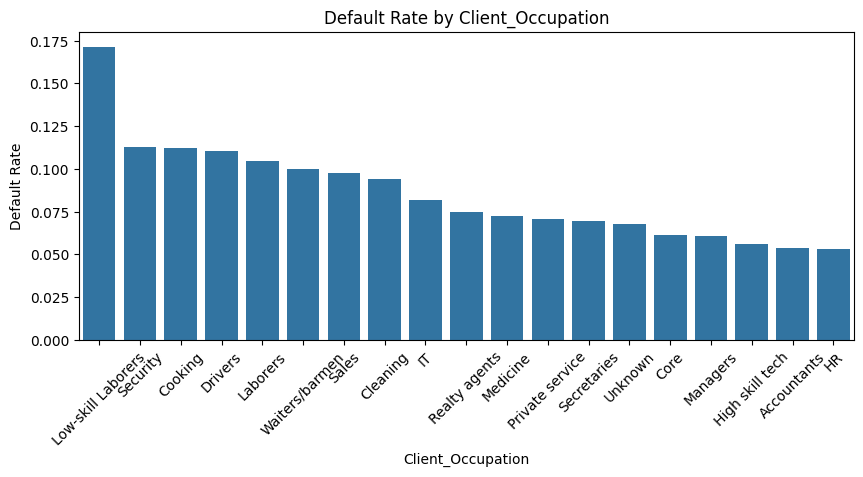


==================== Client_City_Rating ====================
Client_City_Rating
1    0.098436
0    0.077626
Name: Default, dtype: float64

Counts:
Client_City_Rating
0    103316
1     18540
Name: count, dtype: int64


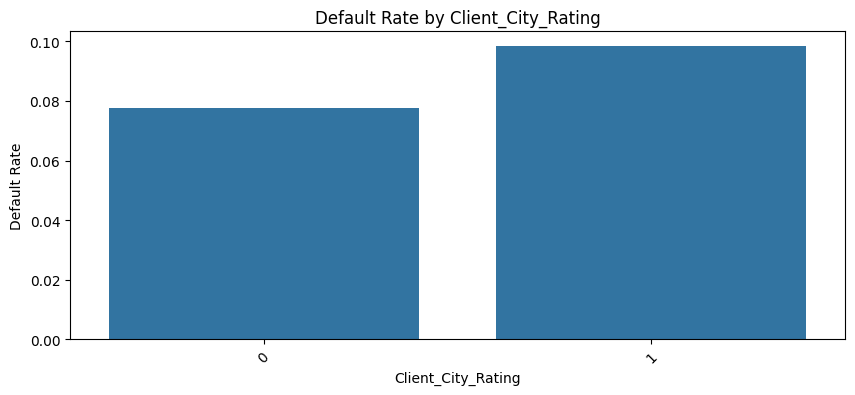


==================== Client_Permanent_Match_Tag ====================
Client_Permanent_Match_Tag
1    0.120825
0    0.077445
Name: Default, dtype: float64

Counts:
Client_Permanent_Match_Tag
0    112454
1      9402
Name: count, dtype: int64


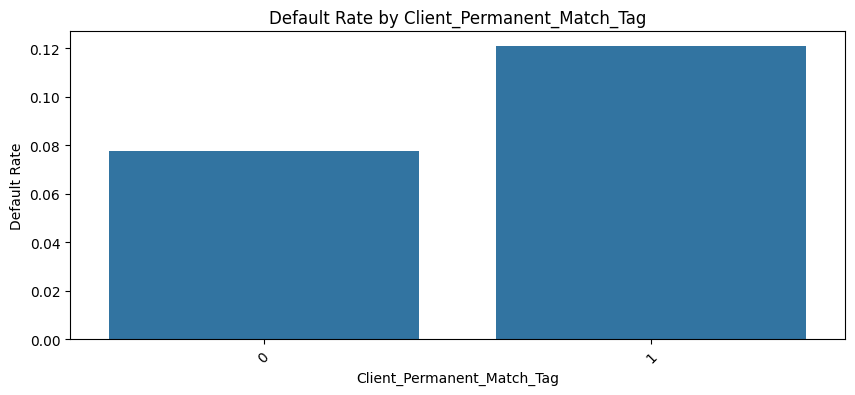


==================== Client_Contact_Work_Tag ====================
Client_Contact_Work_Tag
1    0.097111
0    0.077228
Name: Default, dtype: float64

Counts:
Client_Contact_Work_Tag
0    100015
1     21841
Name: count, dtype: int64


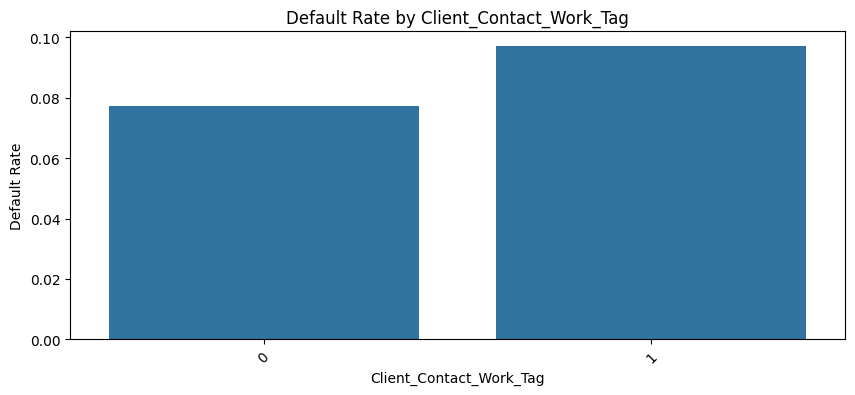


==================== Type_Organization ====================
Type_Organization
Trade: type 5             0.250000
Industry: type 8          0.200000
Transport: type 3         0.147705
Emergency                 0.125604
Construction              0.122760
Industry: type 4          0.121662
Cleaning                  0.118644
Agriculture               0.115727
Restaurant                0.114085
Industry: type 1          0.112219
Security                  0.109813
Transport: type 4         0.103083
Self-employed             0.101596
Legal Services            0.100840
Trade: type 3             0.100149
Industry: type 10         0.100000
Industry: type 3          0.098785
Industry: type 11         0.091091
Trade: type 7             0.090634
Business Entity Type 3    0.090337
Business Entity Type 1    0.089927
Realtor                   0.089744
Industry: type 13         0.085714
Culture                   0.083969
Postal                    0.083933
Business Entity Type 2    0.082647
Mobile     

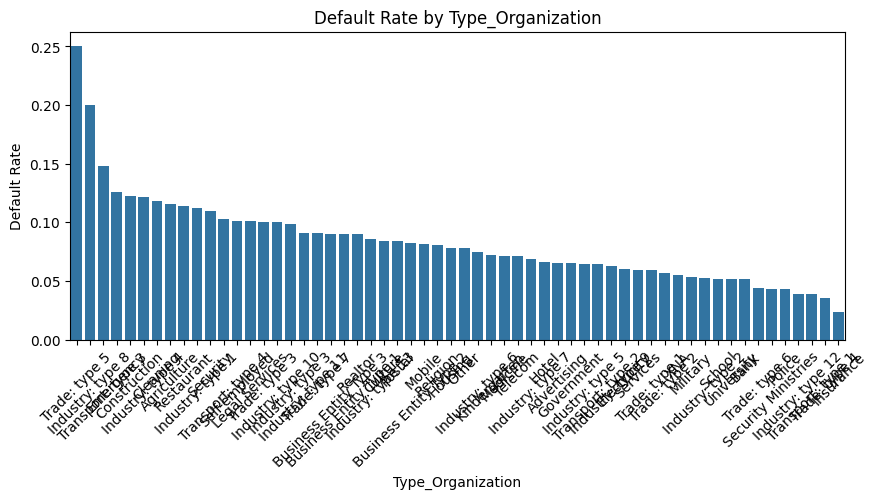


==================== Own_House_Age_Missing ====================
Own_House_Age_Missing
1    0.085336
0    0.072077
Name: Default, dtype: float64

Counts:
Own_House_Age_Missing
1    80095
0    41761
Name: count, dtype: int64


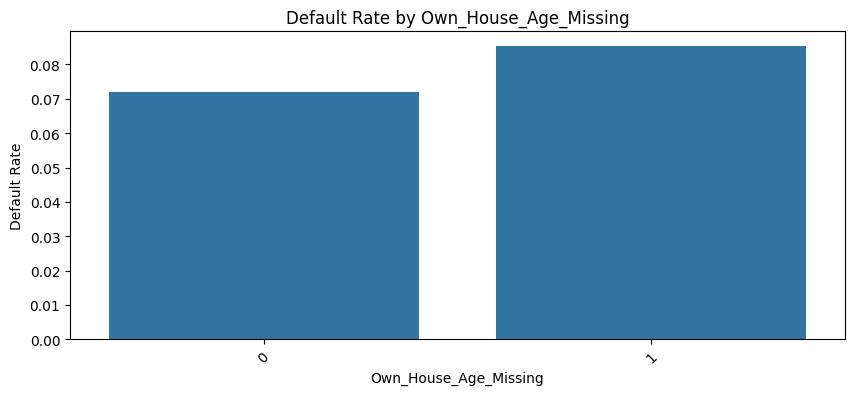


==================== Score_Source_1_missing ====================
Score_Source_1_missing
1    0.086192
0    0.073782
Name: Default, dtype: float64

Counts:
Score_Source_1_missing
1    68835
0    53021
Name: count, dtype: int64


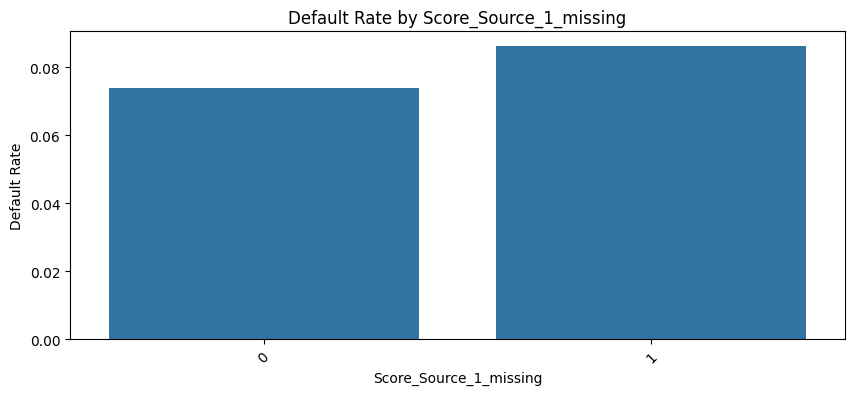


==================== Social_Circle_Default_missing ====================
Social_Circle_Default_missing
1    0.091623
0    0.069600
Name: Default, dtype: float64

Counts:
Social_Circle_Default_missing
1    61928
0    59928
Name: count, dtype: int64


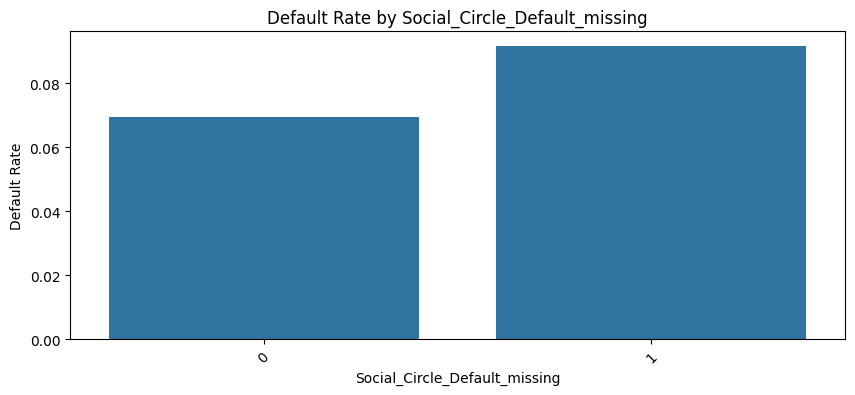


==================== Score_Source_3_missing ====================
Score_Source_3_missing
1    0.088626
0    0.078570
Name: Default, dtype: float64

Counts:
Score_Source_3_missing
0    94934
1    26922
Name: count, dtype: int64


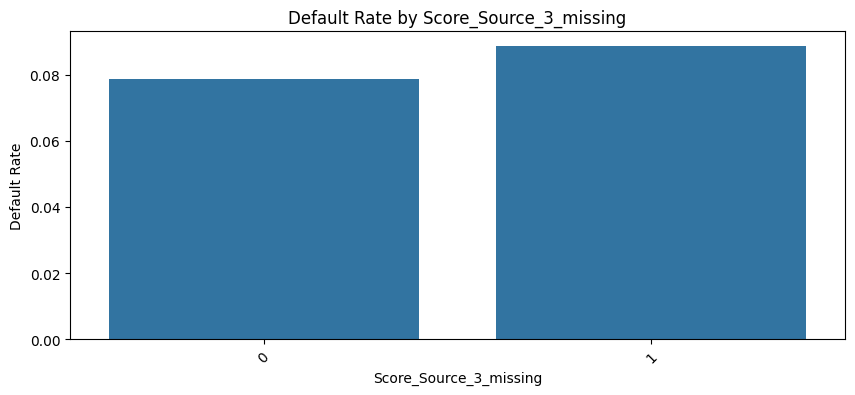


==================== Credit_Bureau_missing ====================
Credit_Bureau_missing
1    0.098436
0    0.077626
Name: Default, dtype: float64

Counts:
Credit_Bureau_missing
0    103316
1     18540
Name: count, dtype: int64


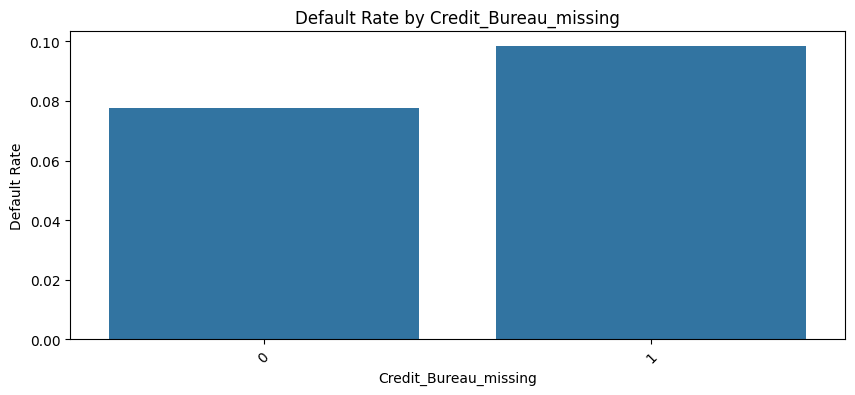

In [81]:
for col in categorical_cols:
    print(f"\n==================== {col} ====================")
    
    # Default rate table
    temp = df.groupby(df[col].astype('object'))['Default'].mean().sort_values(ascending=False)
    print(temp)
    
    # Frequency table
    print("\nCounts:")
    print(df[col].value_counts())
    
    # Plot default rate
    plt.figure(figsize=(10,4))
    sns.barplot(x=temp.index, y=temp.values)
    plt.title(f"Default Rate by {col}")
    plt.ylabel("Default Rate")
    plt.xticks(rotation=45)
    plt.show()

These all seem fine. We can understand visually which category for each column is more likely to default.
No further comments.

In [83]:
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/dataset_cleaned_v2.csv", index=False)

#### Feature Strength Monitoring - AUC

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [85]:
auc_scores_num = {}

for col in numeric_cols:
    print(col, "done")
    X = df[[col]].fillna(0)  # simple handling
    y = df['Default']

    # scale if needed
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # logistic regression
    model = LogisticRegression()
    model.fit(X_scaled, y)
    preds = model.predict_proba(X_scaled)[:,1]

    auc = roc_auc_score(y, preds)
    auc_scores_num[col] = auc

# Sort
sorted_auc_nums = dict(sorted(auc_scores_num.items(), key=lambda x: x[1], reverse=True))
sorted_auc_nums

Client_Income done
Child_Count done
Credit_Amount done
Loan_Annuity done
Population_Region_Relative done
Age_Days done
Employed_Days done
Registration_Days done
ID_Days done
Client_Family_Members done
Application_Process_Day done
Application_Process_Hour done
Score_Source_1 done
Score_Source_2 done
Score_Source_3 done
Social_Circle_Default done
Phone_Change done
Credit_Bureau done
Default done
Own_House_Age_bin done


{'Default': 1.0,
 'Score_Source_2': 0.6468392970854695,
 'Score_Source_3': 0.6429316351833487,
 'Employed_Days': 0.5870923717909715,
 'Age_Days': 0.5767613519638224,
 'Score_Source_1': 0.5759833924748894,
 'ID_Days': 0.5571252907718166,
 'Phone_Change': 0.5564516166402235,
 'Social_Circle_Default': 0.5470931872989203,
 'Registration_Days': 0.5382798256786241,
 'Population_Region_Relative': 0.52991357243495,
 'Application_Process_Hour': 0.523091661184568,
 'Client_Income': 0.5201987181490042,
 'Child_Count': 0.5188556074802184,
 'Credit_Amount': 0.5184796350104536,
 'Own_House_Age_bin': 0.5137560747713512,
 'Credit_Bureau': 0.5118346322176812,
 'Client_Family_Members': 0.5089771129503311,
 'Application_Process_Day': 0.5057632784641939,
 'Loan_Annuity': 0.4998437866548685}

In [86]:
auc_scores_cat = {}

for col in categorical_cols:
    print(col, "done")
    
    X = df[[col]].copy()
    y = df['Default']

    # temporary label encoding
    le = LabelEncoder()
    try:
        X_encoded = le.fit_transform(X[col])
    except:
        X_encoded = X[col].astype(str)
        X_encoded = le.fit_transform(X_encoded)

    X_encoded = X_encoded.reshape(-1,1)

    model = LogisticRegression()
    model.fit(X_encoded, y)
    preds = model.predict_proba(X_encoded)[:,1]

    auc = roc_auc_score(y, preds)
    auc_scores_cat[col] = auc

sorted_auc_cats = dict(sorted(auc_scores_cat.items(), key=lambda x: x[1], reverse=True))
sorted_auc_cats

Car_Owned done
Bike_Owned done
Active_Loan done
House_Own done
Accompany_Client done
Client_Income_Type done
Client_Education done
Client_Marital_Status done
Client_Gender done
Loan_Contract_Type done
Client_Housing_Type done
Homephone_Tag done
Workphone_Working done
Client_Occupation done
Client_City_Rating done
Client_Permanent_Match_Tag done
Client_Contact_Work_Tag done
Type_Organization done
Own_House_Age_Missing done
Score_Source_1_missing done
Social_Circle_Default_missing done
Score_Source_3_missing done
Credit_Bureau_missing done


{'Client_Education': 0.5482400519150201,
 'Client_Gender': 0.543835233950645,
 'Client_Income_Type': 0.5397790984569149,
 'Social_Circle_Default_missing': 0.5370573159671037,
 'Type_Organization': 0.5295134747861932,
 'Workphone_Working': 0.5211844399179053,
 'Client_Permanent_Match_Tag': 0.5207960992585348,
 'Score_Source_1_missing': 0.5205355443328978,
 'Own_House_Age_Missing': 0.5201090698580495,
 'Client_Occupation': 0.5197202662643882,
 'Client_Contact_Work_Tag': 0.5196925858769974,
 'Car_Owned': 0.519514655880742,
 'Client_City_Rating': 0.5180734353345793,
 'Credit_Bureau_missing': 0.5180734353345793,
 'Homephone_Tag': 0.5158619043704802,
 'Loan_Contract_Type': 0.5142957568571893,
 'Score_Source_3_missing': 0.5116533057074462,
 'Client_Marital_Status': 0.5091174994743474,
 'Accompany_Client': 0.506848329790435,
 'House_Own': 0.5005199441274131,
 'Bike_Owned': 0.5003777054128205,
 'Active_Loan': 0.4999327684292633,
 'Client_Housing_Type': 0.4965513490093403}

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   ID                             121856 non-null  object  
 1   Client_Income                  121856 non-null  float64 
 2   Car_Owned                      121856 non-null  category
 3   Bike_Owned                     121856 non-null  category
 4   Active_Loan                    121856 non-null  category
 5   House_Own                      121856 non-null  category
 6   Child_Count                    121856 non-null  float64 
 7   Credit_Amount                  121856 non-null  float64 
 8   Loan_Annuity                   121856 non-null  float64 
 9   Accompany_Client               121856 non-null  object  
 10  Client_Income_Type             121856 non-null  object  
 11  Client_Education               121856 non-null  object  
 12  Client_Marital_S

In [88]:
nominal_cols = [
    col for col in df.columns
    if df[col].dtype in ['object', 'category']
]

In [89]:
from sklearn.preprocessing import LabelEncoder

for col in nominal_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


In [91]:
df['Default'].value_counts()

Default
0    112011
1      9845
Name: count, dtype: int64

In [92]:
# Use  stratified random split
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(
    df, test_size=0.30, stratify=df['Default'], random_state=42
)
val_df, test_df = train_test_split(
    temp_df, test_size=0.50, stratify=temp_df['Default'], random_state=42
)


In [94]:
train_df.to_csv("../data/processed/train.csv", index=False)
val_df.to_csv("../data/processed/val.csv", index=False)
test_df.to_csv("../data/processed/test.csv", index=False)